In [116]:
!uv pip install seaborn


Using Python 3.13.3 environment at: /Users/sebastianholmberg/Python_Kunskapskontroll/diamonds_analys/.venv
Audited 1 package in 17ms


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('diamonds.csv')

In [119]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [120]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Det fanns en del diamanter som hade 0 värde i X, Y , Z kolumnerna och dom behvöer vi ta bort. Och där var någon diamant som var alldeles för stor enligt proportioner. Så det har vi behövt att rensa upp. 

In [121]:
df = df[(df.y < 30) & (df.z < 30) & (df.x > 0) & ( df.z > 0) & (df.z > 0)].copy()

In [122]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [123]:
df.describe()

,carat,depth,table,price,x,y,z
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409
std,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [181]:
#  GULDFYND BUSINESS CASE
print("🏢 GULDFYND DIAMANT EXPANSION ANALYS")
print("="*50)
print("""
BAKGRUND:
Guldfynd är en etablerad nordisk smyckeskedja specialiserad på guld och silver.
Vi undersöker möjligheten att expandera till diamantmarknaden.

AFFÄRSFRÅGOR:
1. Vilka diamantsegment passar vår befintliga kundkrets?
2. Vilka prisklasser ska vi fokusera på?
3. Hur stor är marknaden för olika kvalitetsnivåer?
4. Vilka rekommendationer ger bäst ROI för vår expansion?
""")

🏢 GULDFYND DIAMANT EXPANSION ANALYS

BAKGRUND:
Guldfynd är en etablerad nordisk smyckeskedja specialiserad på guld och silver.
Vi undersöker möjligheten att expandera till diamantmarknaden.

AFFÄRSFRÅGOR:
1. Vilka diamantsegment passar vår befintliga kundkrets?
2. Vilka prisklasser ska vi fokusera på?
3. Hur stor är marknaden för olika kvalitetsnivåer?
4. Vilka rekommendationer ger bäst ROI för vår expansion?



Del 1:
Skapa en översikt av våra diamanter och dess statistik!

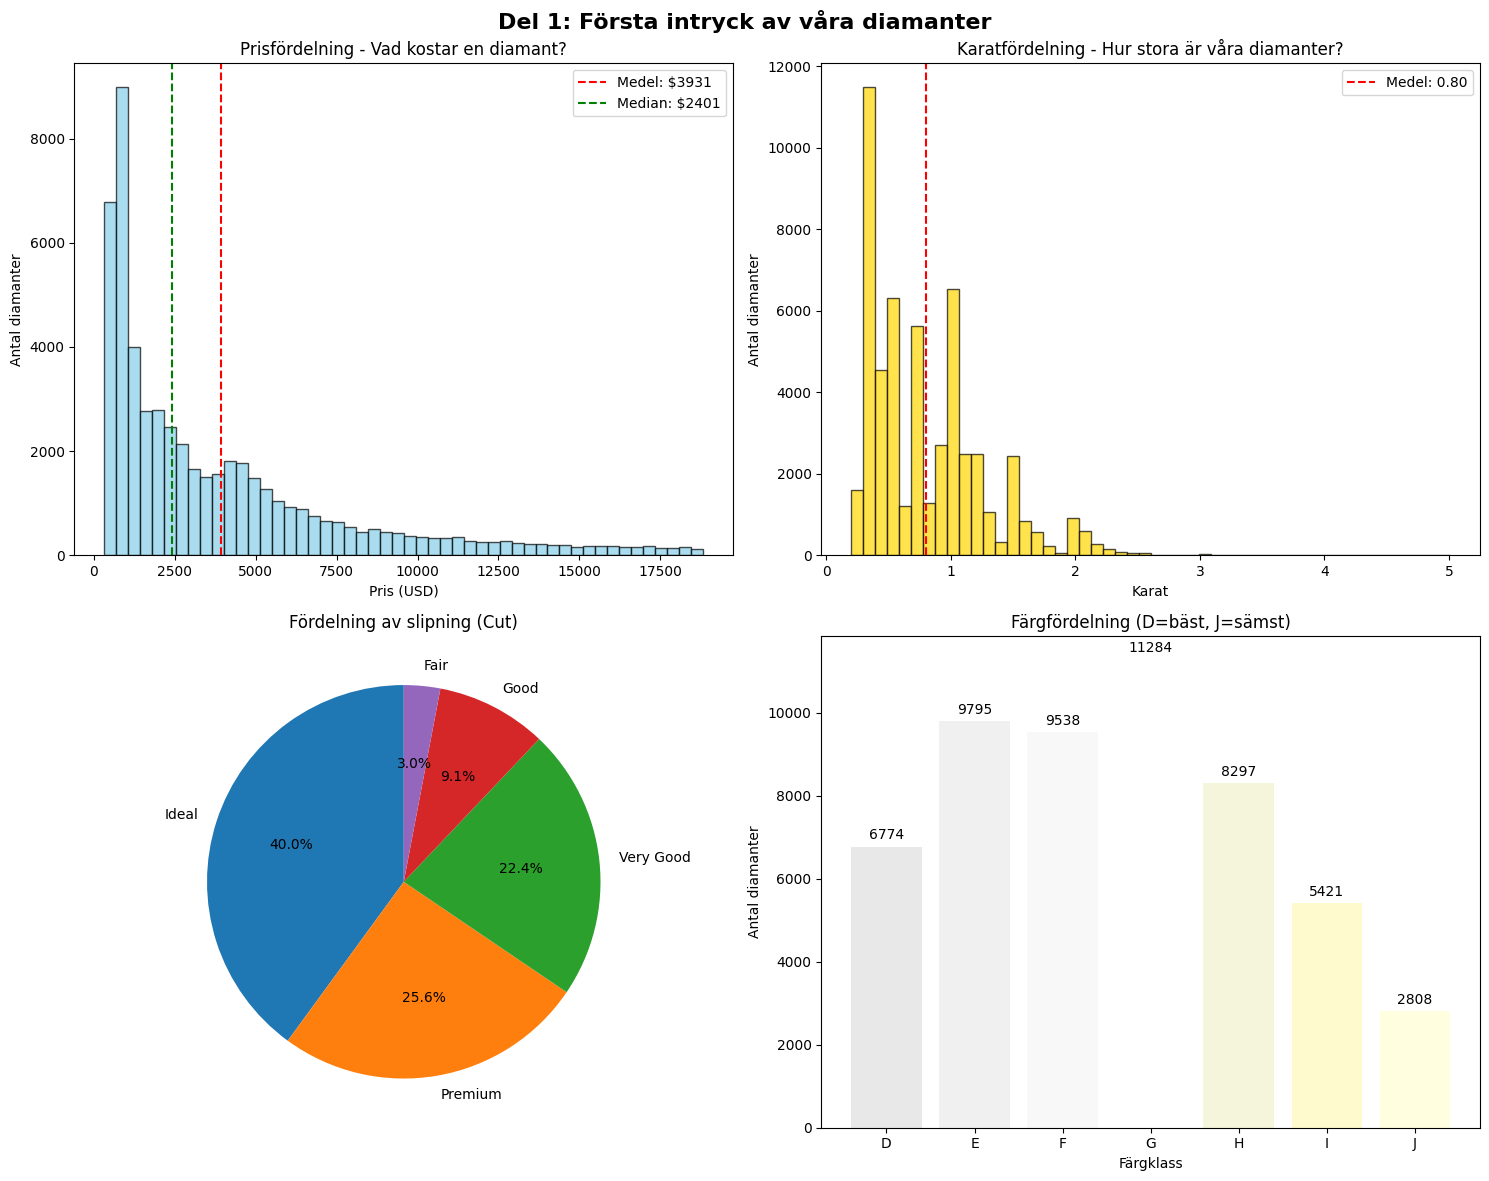

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Del 1: Första intryck av våra diamanter', fontsize=16, fontweight='bold')


axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Prisfördelning - Vad kostar en diamant?')
axes[0,0].set_xlabel('Pris (USD)')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Medel: ${df["price"].mean():.0f}')
axes[0,0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():.0f}')
axes[0,0].legend()


axes[0,1].hist(df['carat'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[0,1].set_title('Karatfördelning - Hur stora är våra diamanter?')
axes[0,1].set_xlabel('Karat')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].axvline(df['carat'].mean(), color='red', linestyle='--', label=f'Medel: {df["carat"].mean():.2f}')
axes[0,1].legend()


cut_counts = df['cut'].value_counts()
axes[1,0].pie(cut_counts.values, labels=cut_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Fördelning av slipning (Cut)')


color_counts = df['color'].value_counts().sort_index()
bars = axes[1,1].bar(color_counts.index, color_counts.values, 
                     color=['#E8E8E8', '#F0F0F0', '#F8F8F8', '#FFFFFF', '#F5F5DC', '#FFFACD', '#FFFFE0'])
axes[1,1].set_title('Färgfördelning (D=bäst, J=sämst)')
axes[1,1].set_xlabel('Färgklass')
axes[1,1].set_ylabel('Antal diamanter')


for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 100,
                   f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Del 2:
Djupdykningen inom pris och vad som påverkar priset. 

In [125]:
print("Korrelation mellan numeriska variabler och pris:")
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix['price'].sort_values(ascending=False))


Korrelation mellan numeriska variabler och pris:
price    1.000000
carat    0.921586
y        0.888818
x        0.887221
z        0.882107
table    0.127241
depth   -0.010653
Name: price, dtype: float64


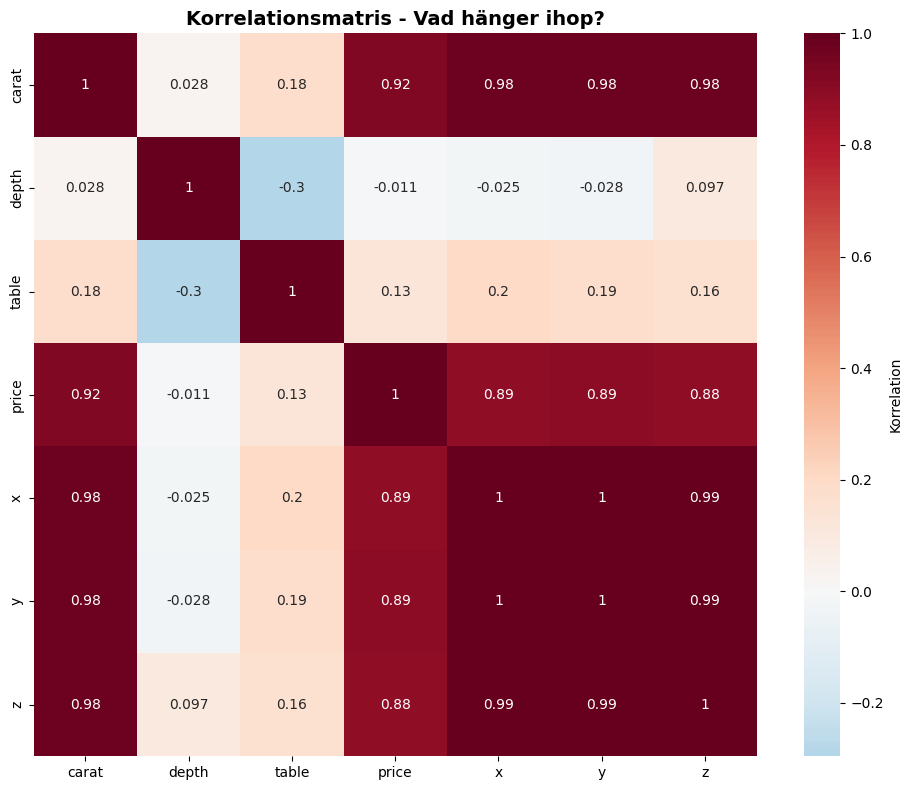

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, cbar_kws={'label': 'Korrelation'})
plt.title('Korrelationsmatris - Vad hänger ihop?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

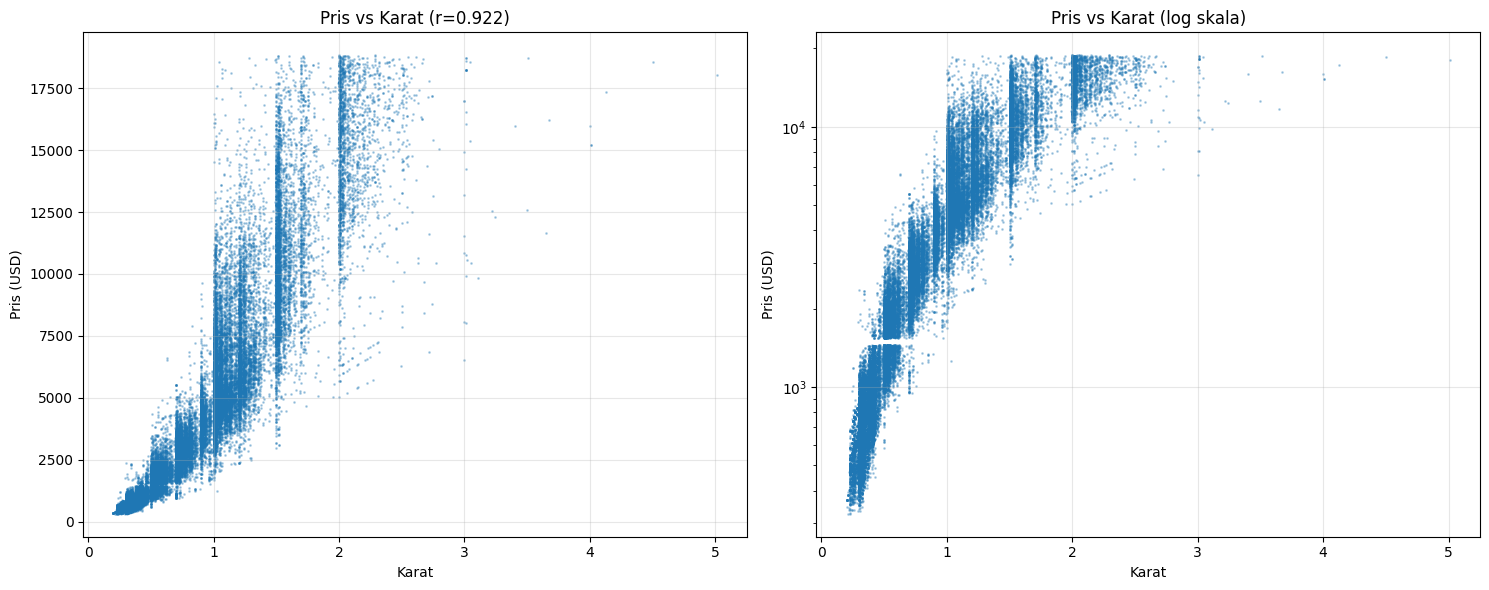

In [127]:
# Pris vs Karat (Starkaste korrelation)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(df['carat'], df['price'], alpha=0.3, s=1)
ax1.set_xlabel('Karat')
ax1.set_ylabel('Pris (USD)')
ax1.set_title(f'Pris vs Karat (r={correlation_matrix.loc["price", "carat"]:.3f})')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['carat'], df['price'], alpha=0.3, s=1)
ax2.set_xlabel('Karat')
ax2.set_ylabel('Pris (USD)')
ax2.set_yscale('log')
ax2.set_title('Pris vs Karat (log skala)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

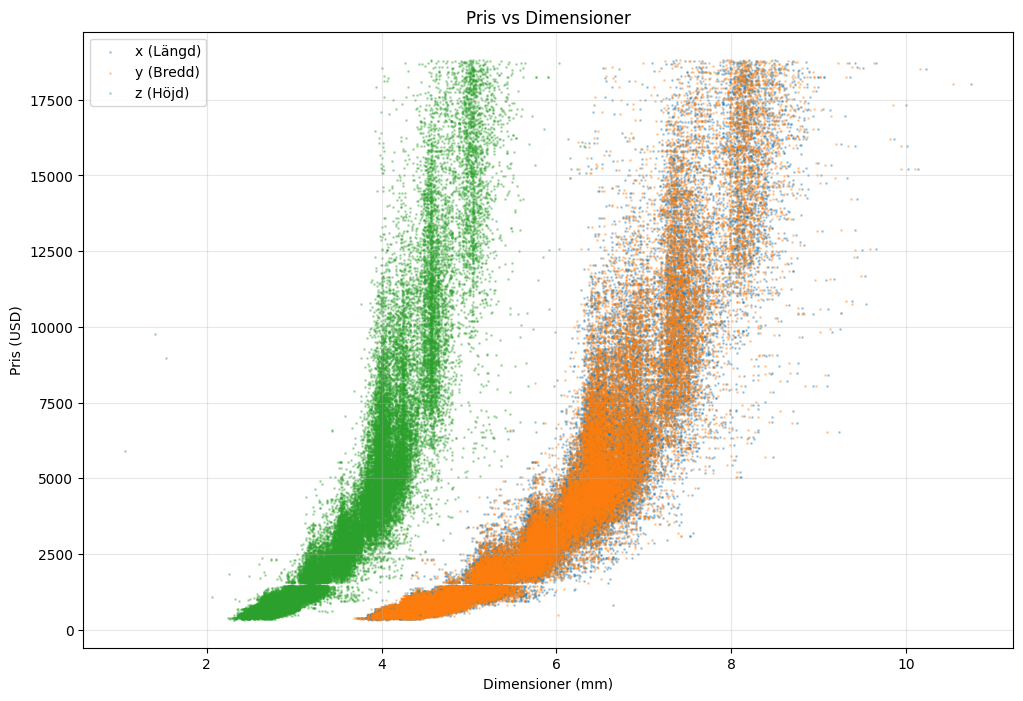

In [128]:
# Pris vs dimensioner

plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['price'], alpha=0.3, s=1, label='x (Längd)')
plt.scatter(df['y'], df['price'], alpha=0.3, s=1, label='y (Bredd)')
plt.scatter(df['z'], df['price'], alpha=0.3, s=1, label='z (Höjd)')
plt.xlabel('Dimensioner (mm)')
plt.ylabel('Pris (USD)')
plt.title('Pris vs Dimensioner')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


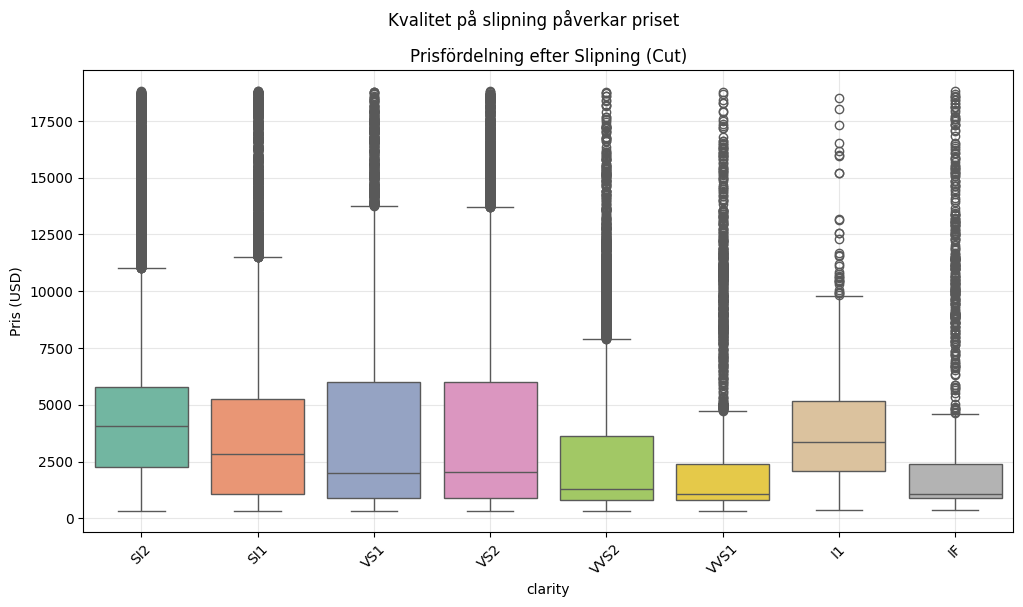

In [129]:
# Pris vs Cut
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning efter Slipning (Cut)')
plt.suptitle('Kvalitet på slipning påverkar priset')
plt.xticks(rotation=45)
plt.ylabel('Pris (USD)')
plt.grid(True, alpha=0.3)
plt.show()

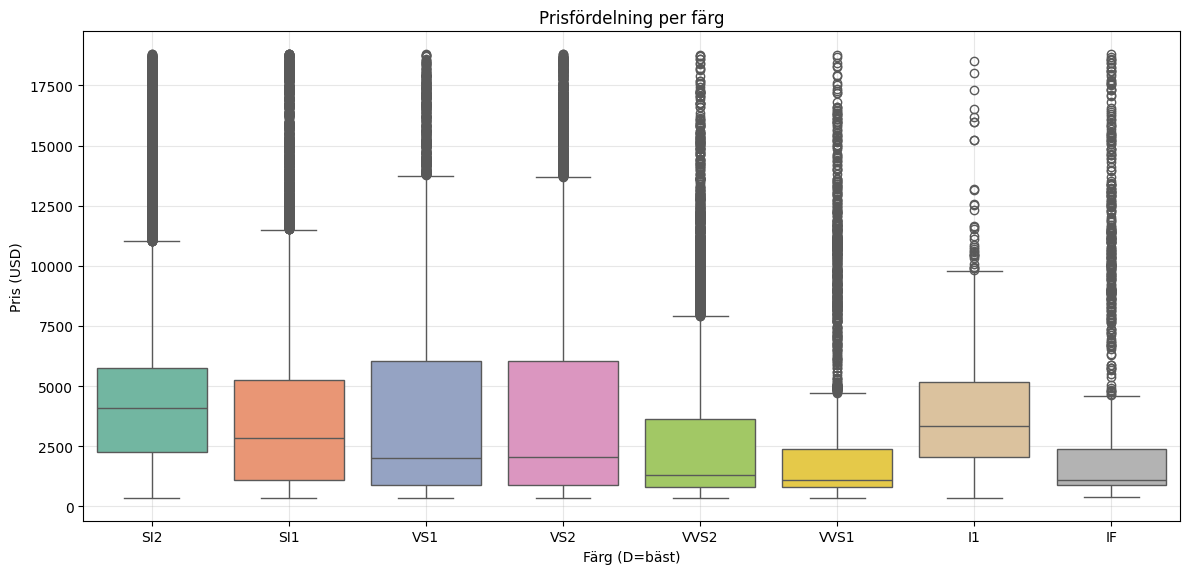

In [130]:
#Pris vs Color
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning per färg')
plt.suptitle('')
plt.xlabel('Färg (D=bäst)')
plt.ylabel('Pris (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

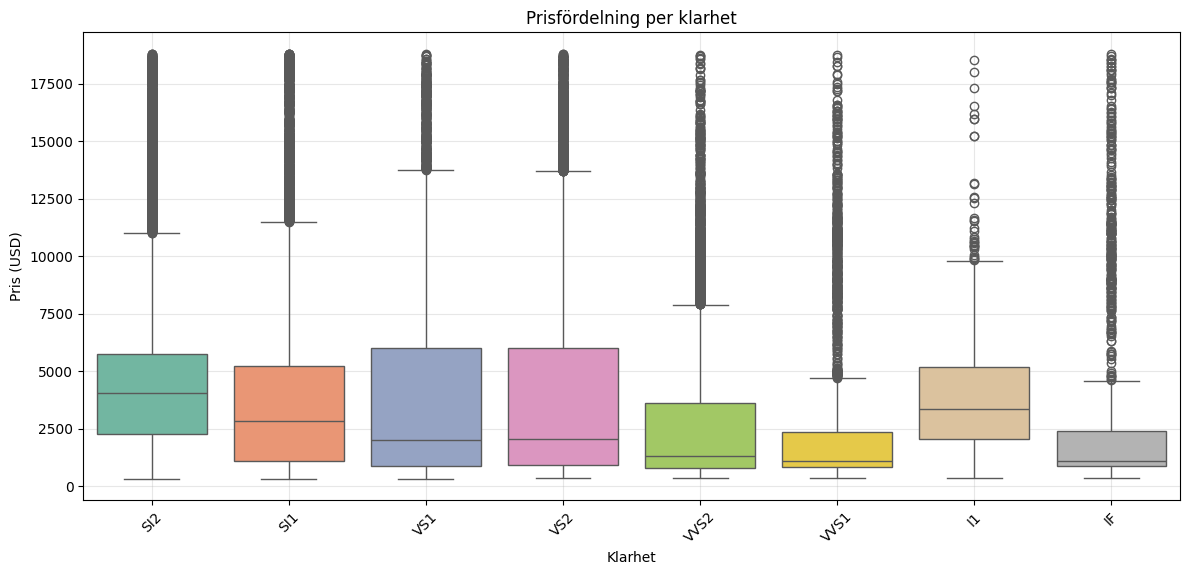

In [131]:
# Pris vs Clarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', data=df, hue='clarity', palette='Set2', legend=False)
plt.title('Prisfördelning per klarhet')
plt.suptitle('')
plt.xlabel('Klarhet')
plt.ylabel('Pris (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Del 3:
Analysera Cut, Clarity, Color & Carat 

In [132]:
print("Genomsnittligt pris per kategori:")
print("\n CUT (Slipning):")
cut_analysis = df.groupby('cut').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
cut_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(cut_analysis.sort_values('Medelpris', ascending=False))

print("\n COLOR (Färg):")
color_analysis = df.groupby('color').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
color_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(color_analysis.sort_values('Medelpris', ascending=False))

print("\n CLARITY (Klarhet):")
clarity_analysis = df.groupby('clarity').agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean'
}).round(2)
clarity_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat']
print(clarity_analysis.sort_values('Medelpris', ascending=False))

Genomsnittligt pris per kategori:

 CUT (Slipning):
           Medelpris  Medianpris  Antal  Medelkarat
cut                                                
Premium      4579.13      3181.0  13779        0.89
Fair         4357.50      3282.0   1609        1.05
Very Good    3981.83      2648.0  12080        0.81
Good         3926.40      3050.5   4902        0.85
Ideal        3457.01      1809.0  21547        0.70

 COLOR (Färg):
       Medelpris  Medianpris  Antal  Medelkarat
color                                          
J        5323.82      4234.0   2808        1.16
I        5089.97      3730.0   5421        1.03
H        4480.01      3453.0   8297        0.91
G        3996.88      2240.0  11284        0.77
F        3725.08      2343.5   9538        0.74
D        3168.11      1836.5   6774        0.66
E        3076.97      1738.0   9795        0.66

 CLARITY (Klarhet):
         Medelpris  Medianpris  Antal  Medelkarat
clarity                                          
SI2        5059

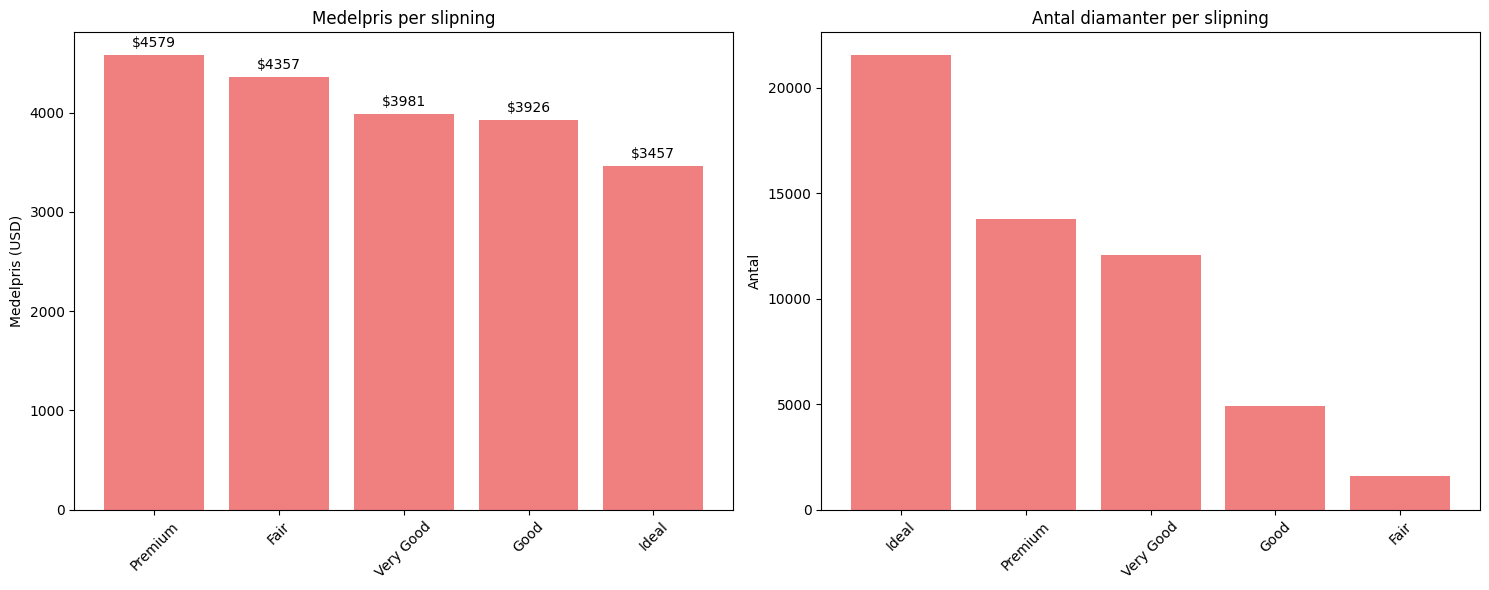

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


cut_price = df.groupby('cut')['price'].mean().sort_values(ascending=False)
bars1 = ax1.bar(cut_price.index, cut_price.values, color='lightcoral')
ax1.set_title('Medelpris per slipning')
ax1.set_ylabel('Medelpris (USD)')
ax1.tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


cut_count = df['cut'].value_counts()
ax2.bar(cut_count.index, cut_count.values, color='lightcoral')
ax2.set_title('Antal diamanter per slipning')
ax2.set_ylabel('Antal')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

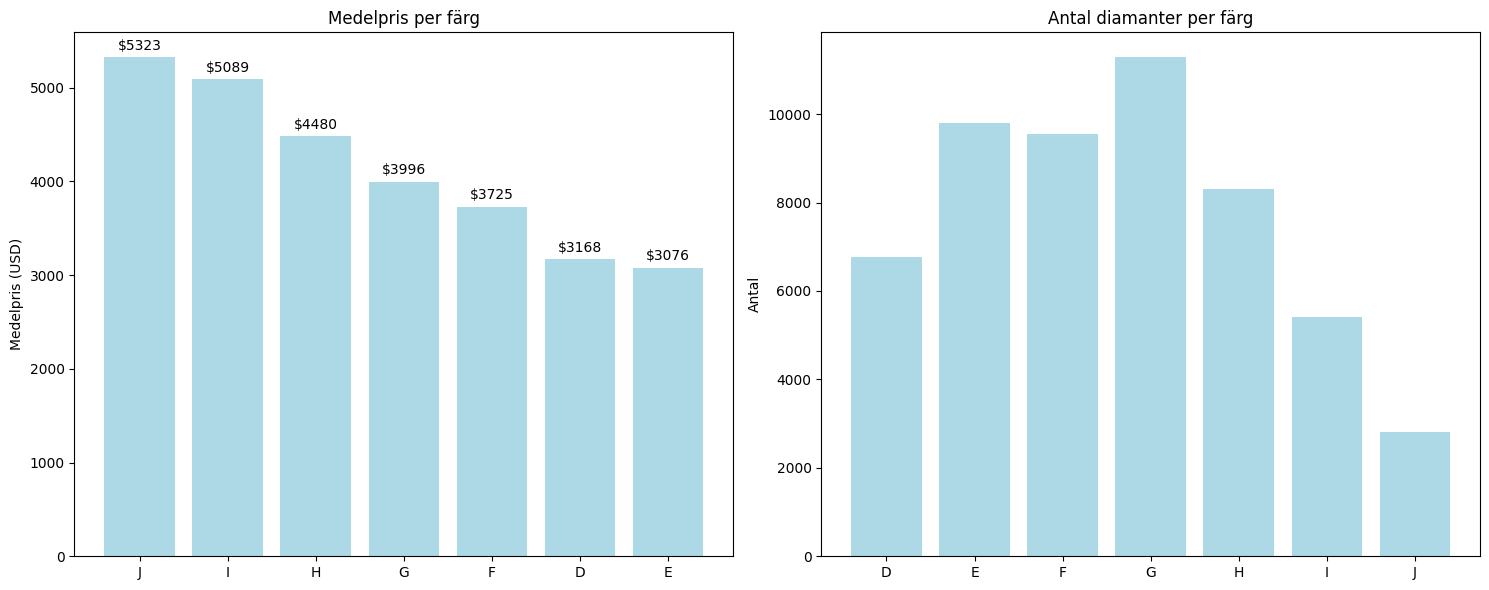

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


color_price = df.groupby('color')['price'].mean().sort_values(ascending=False)
bars2 = ax1.bar(color_price.index, color_price.values, color='lightblue')
ax1.set_title('Medelpris per färg')
ax1.set_ylabel('Medelpris (USD)')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


color_count = df['color'].value_counts().sort_index()
ax2.bar(color_count.index, color_count.values, color='lightblue')
ax2.set_title('Antal diamanter per färg')
ax2.set_ylabel('Antal')

plt.tight_layout()
plt.show()

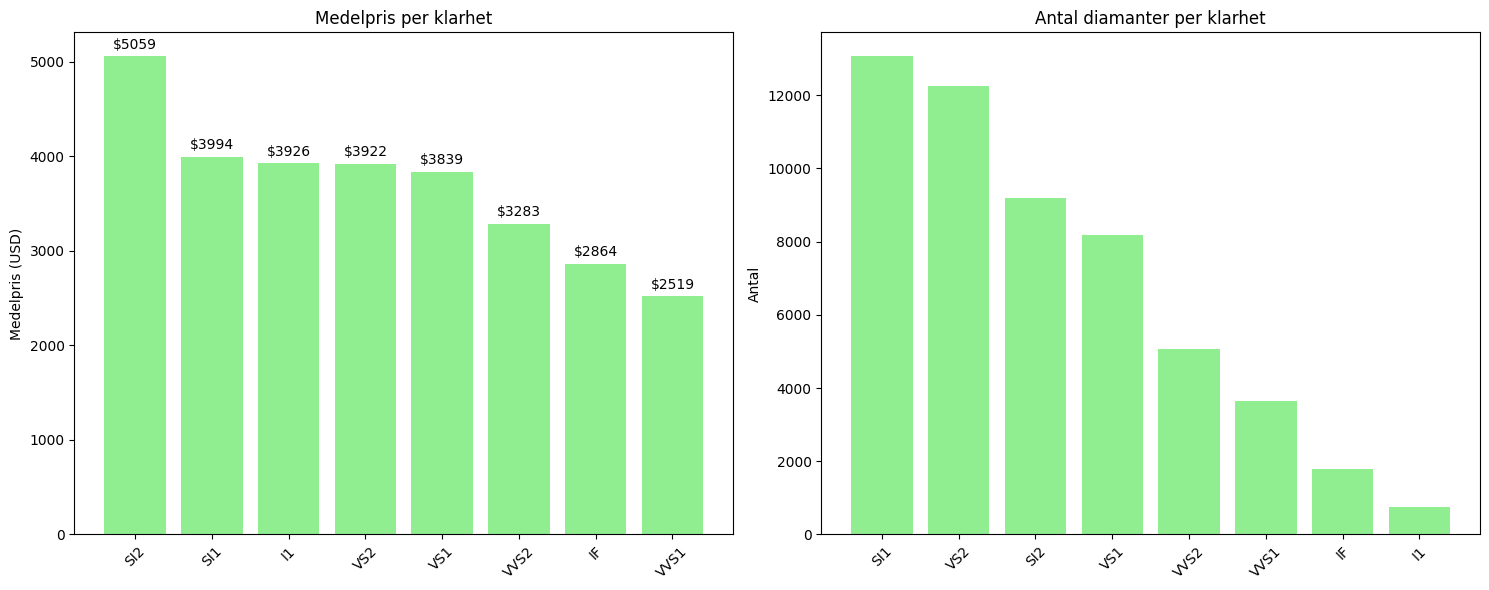

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


clarity_price = df.groupby('clarity')['price'].mean().sort_values(ascending=False)
bars3 = ax1.bar(clarity_price.index, clarity_price.values, color='lightgreen')
ax1.set_title('Medelpris per klarhet')
ax1.set_ylabel('Medelpris (USD)')
ax1.tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${int(height)}', ha='center', va='bottom')


clarity_count = df['clarity'].value_counts()
ax2.bar(clarity_count.index, clarity_count.values, color='lightgreen')
ax2.set_title('Antal diamanter per klarhet')
ax2.set_ylabel('Antal')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 CARAT ANALYS:
Prisfördelning per karat-intervall:
                 price        carat
                  mean  count  mean
carat                              
(0.2, 0.68]    1068.90  25153  0.40
(0.68, 1.16]   4321.61  18615  0.91
(1.16, 1.64]   8709.83   7126  1.38
(1.64, 2.12]  13757.16   2347  1.92
(2.12, 2.6]   15237.26    610  2.28
(2.6, 3.09]   14439.21     52  2.85
(3.09, 3.57]  13653.33      6  3.33
(3.57, 4.05]  14858.20      5  3.87
(4.05, 4.53]  17930.00      2  4.31
(4.53, 5.01]  18018.00      1  5.01


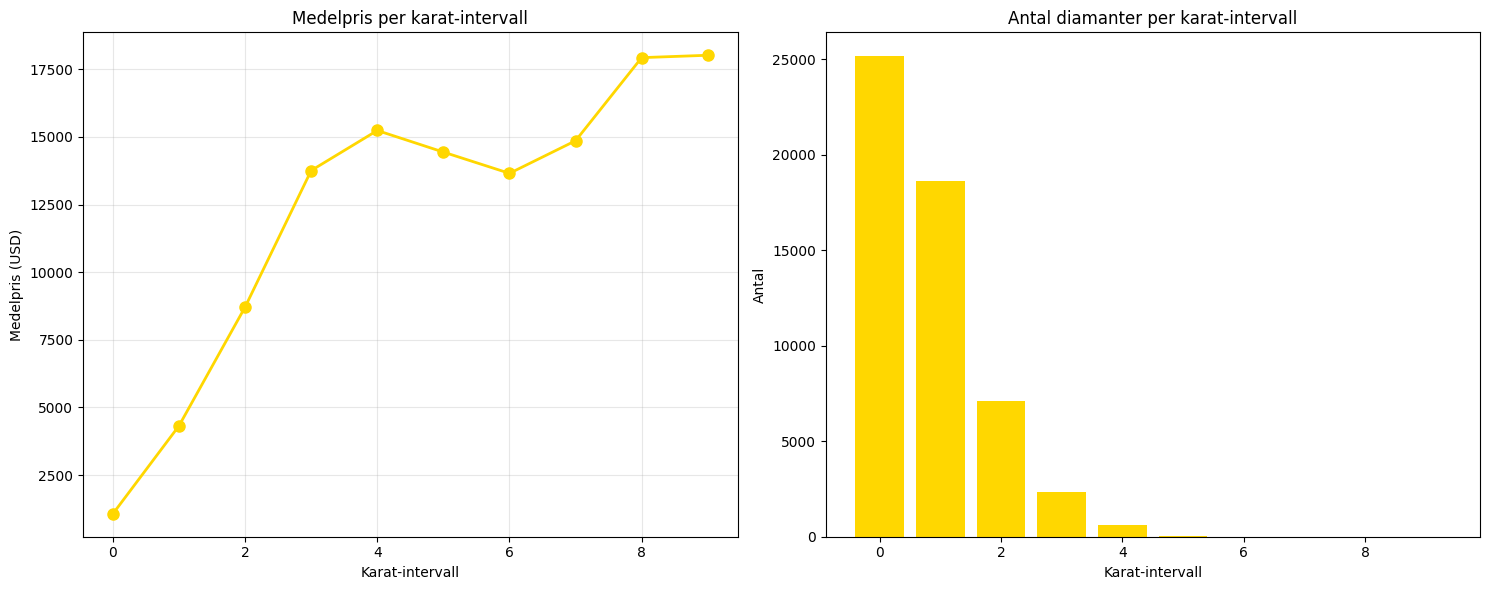

In [179]:
carat_bins = pd.cut(df['carat'], bins=10, precision=2)
carat_analysis = df.groupby(carat_bins, observed=False).agg({
    'price': ['mean', 'count'],
    'carat': 'mean'
}).round(2)

print("\n CARAT ANALYS:")
print("Prisfördelning per karat-intervall:")
print(carat_analysis)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


carat_price = df.groupby(carat_bins, observed=False)['price'].mean()
ax1.plot(range(len(carat_price)), carat_price.values, marker='o', color='gold', linewidth=2, markersize=8)
ax1.set_title('Medelpris per karat-intervall')
ax1.set_ylabel('Medelpris (USD)')
ax1.set_xlabel('Karat-intervall')
ax1.grid(True, alpha=0.3)


carat_count = df.groupby(carat_bins, observed=False).size()
ax2.bar(range(len(carat_count)), carat_count.values, color='gold')
ax2.set_title('Antal diamanter per karat-intervall')
ax2.set_ylabel('Antal')
ax2.set_xlabel('Karat-intervall')

plt.tight_layout()
plt.show()

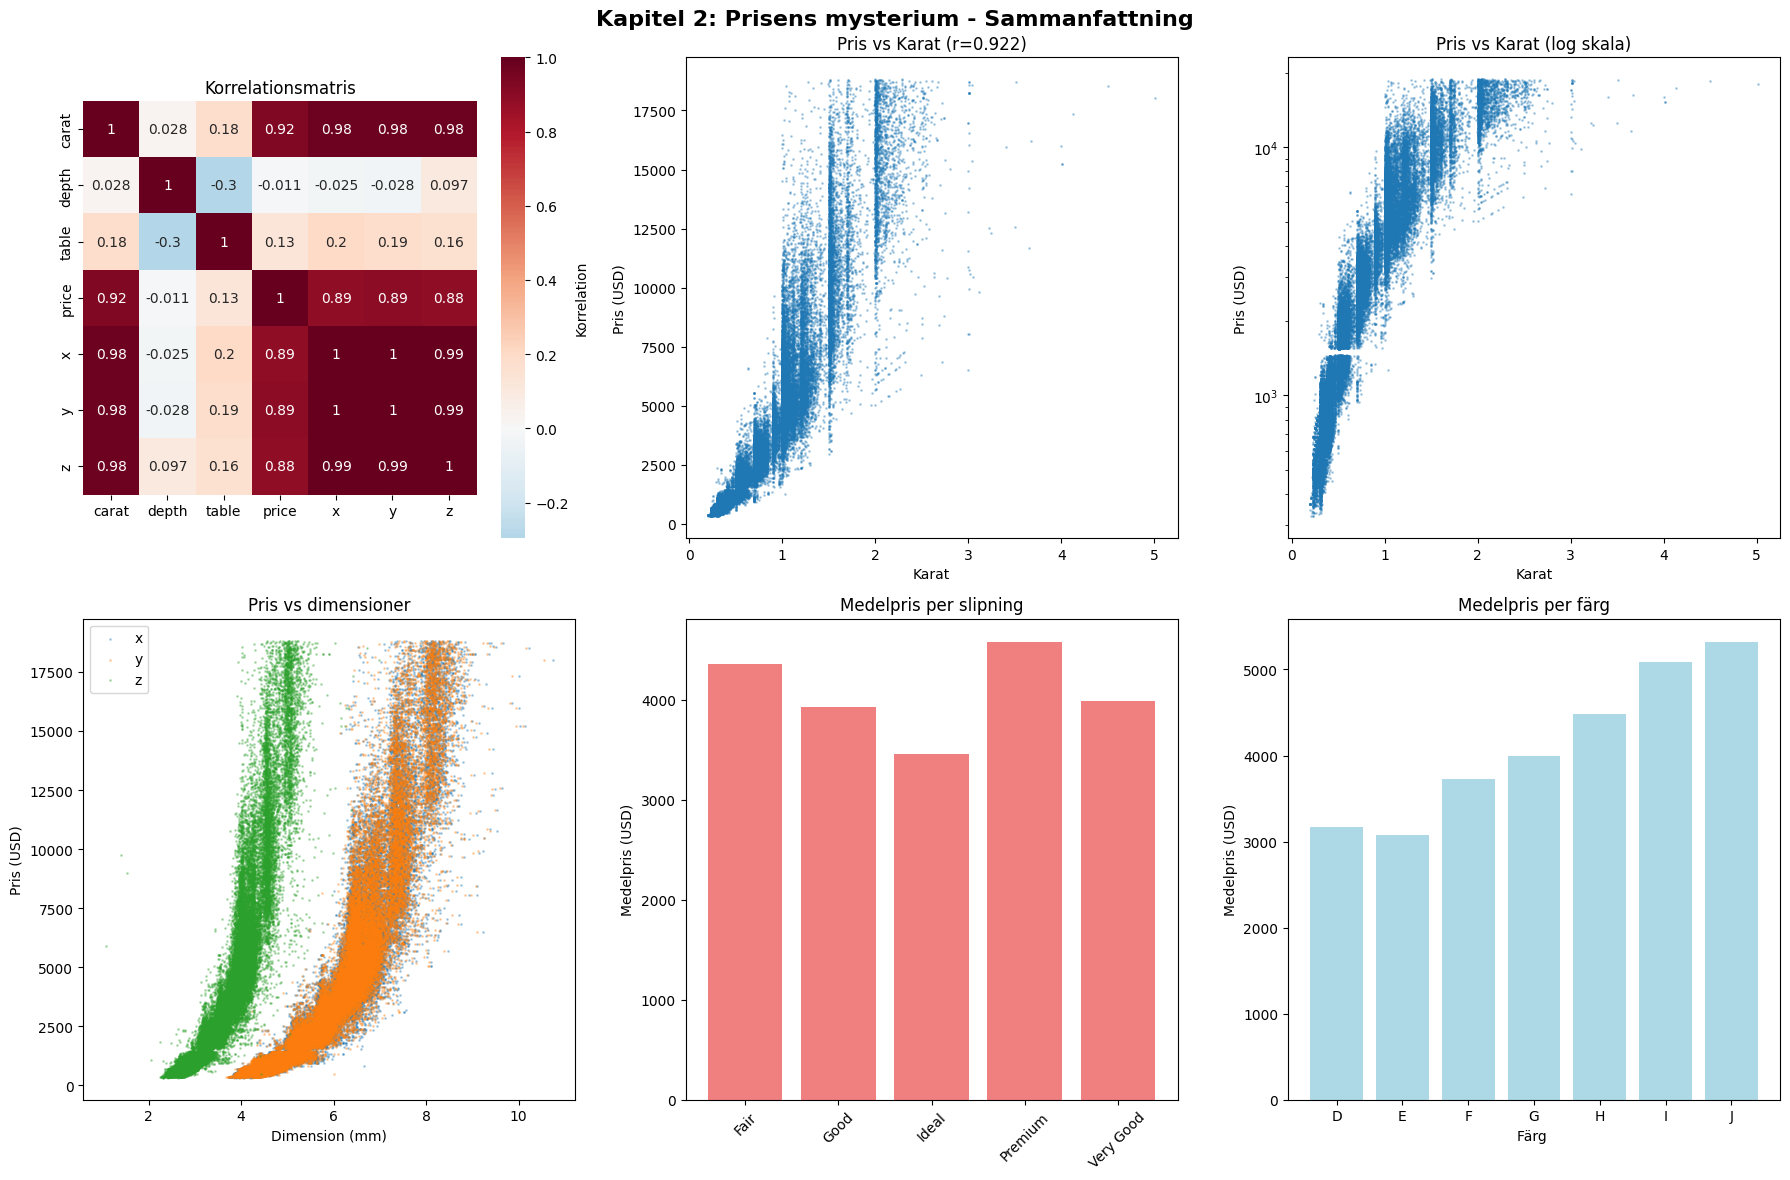

In [180]:
# Sammanfattande visualisering av korrelationer
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, cbar_kws={'label': 'Korrelation'})
plt.title('Korrelationsmatris')


plt.subplot(2, 3, 2)
plt.scatter(df['carat'], df['price'], alpha=0.3, s=1)
plt.xlabel('Karat')
plt.ylabel('Pris (USD)')
plt.title(f'Pris vs Karat (r={correlation_matrix.loc["price", "carat"]:.3f})')


plt.subplot(2, 3, 3)
plt.scatter(df['carat'], df['price'], alpha=0.3, s=1)
plt.xlabel('Karat')
plt.ylabel('Pris (USD)')
plt.yscale('log')
plt.title('Pris vs Karat (log skala)')


plt.subplot(2, 3, 4)
plt.scatter(df['x'], df['price'], alpha=0.3, s=1, label='x')
plt.scatter(df['y'], df['price'], alpha=0.3, s=1, label='y')
plt.scatter(df['z'], df['price'], alpha=0.3, s=1, label='z')
plt.xlabel('Dimension (mm)')
plt.ylabel('Pris (USD)')
plt.title('Pris vs dimensioner')
plt.legend()


plt.subplot(2, 3, 5)
cut_price = df.groupby('cut')['price'].mean()
plt.bar(cut_price.index, cut_price.values, color='lightcoral')
plt.title('Medelpris per slipning')
plt.xticks(rotation=45)
plt.ylabel('Medelpris (USD)')


plt.subplot(2, 3, 6)
color_price = df.groupby('color')['price'].mean()
plt.bar(color_price.index, color_price.values, color='lightblue')
plt.title('Medelpris per färg')
plt.xlabel('Färg ')
plt.ylabel('Medelpris (USD)')

plt.suptitle('Kapitel 2: Prisens mysterium - Sammanfattning', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [138]:

df['volume'] = df['x'] * df['y'] * df['z']
df['surface_area_approx'] = 2 * (df['x']*df['y'] + df['y']*df['z'] + df['x']*df['z'])
df['aspect_ratio_xy'] = df['x'] / df['y']
df['aspect_ratio_xz'] = df['x'] / df['z']

print("Geometriska statistik:")
print(f"Genomsnittlig volym: {df['volume'].mean():.2f} mm³")
print(f"Genomsnittlig yta (approx): {df['surface_area_approx'].mean():.2f} mm²")
print(f"Genomsnittlig depth: {df['depth'].mean():.2f}%")
print(f"Genomsnittlig table: {df['table'].mean():.2f}%")
print(f"Genomsnittlig x/y ratio: {df['aspect_ratio_xy'].mean():.3f}")


print(f"\nDimensionsstatistik:")
print(f"X (längd): {df['x'].mean():.2f} ± {df['x'].std():.2f} mm")
print(f"Y (bredd): {df['y'].mean():.2f} ± {df['y'].std():.2f} mm") 
print(f"Z (höjd): {df['z'].mean():.2f} ± {df['z'].std():.2f} mm")

Geometriska statistik:
Genomsnittlig volym: 129.80 mm³
Genomsnittlig yta (approx): 152.42 mm²
Genomsnittlig depth: 61.75%
Genomsnittlig table: 57.46%
Genomsnittlig x/y ratio: 0.999

Dimensionsstatistik:
X (längd): 5.73 ± 1.12 mm
Y (bredd): 5.73 ± 1.11 mm
Z (höjd): 3.54 ± 0.69 mm


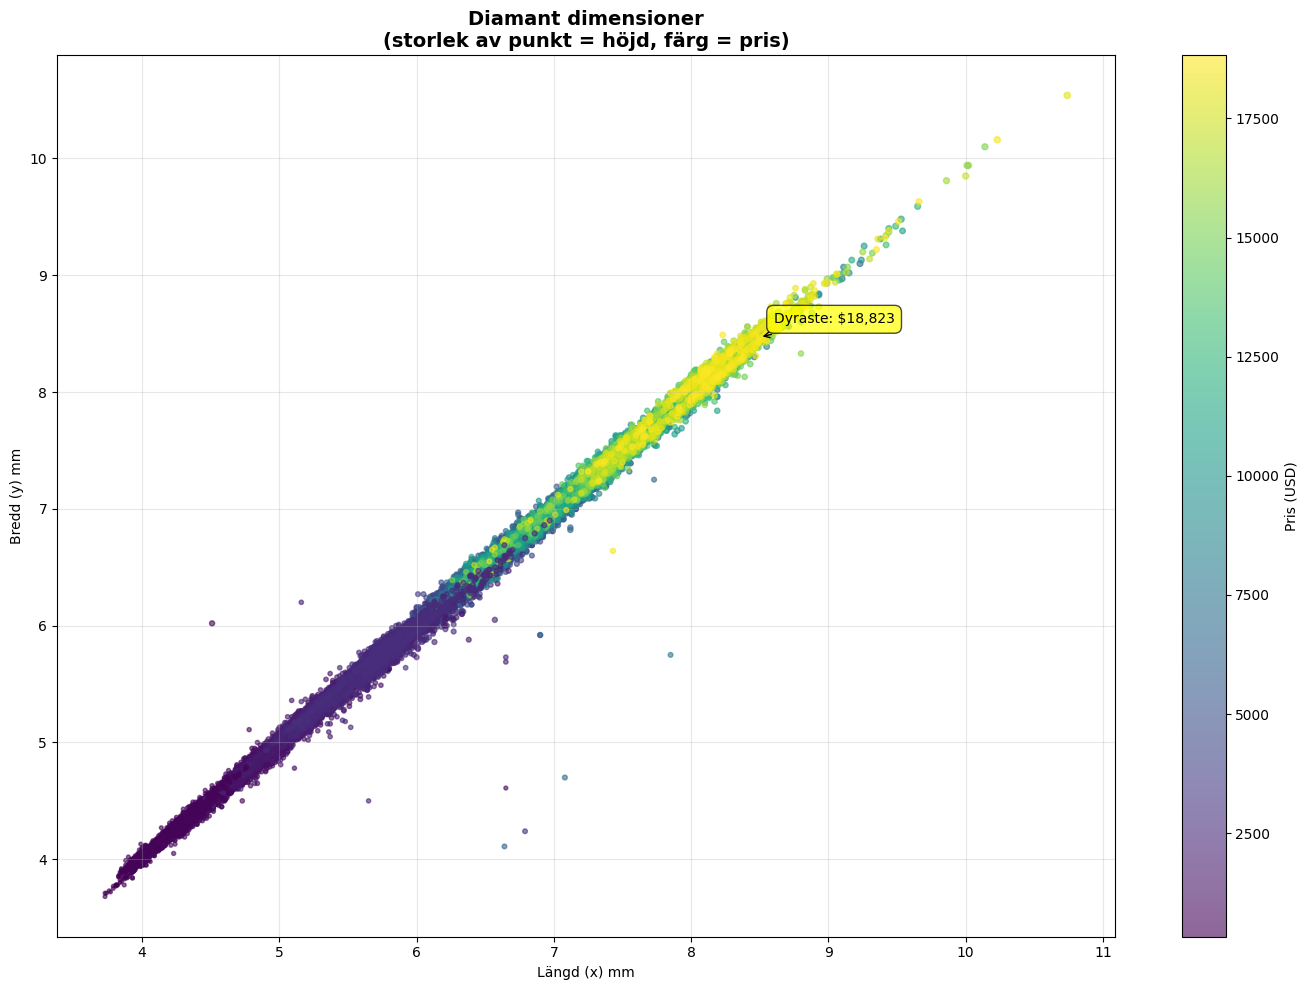

In [139]:
plt.figure(figsize=(14, 10))


scatter = plt.scatter(df['x'], df['y'], c=df['price'], s=df['z']*3, alpha=0.6, cmap='viridis')
plt.xlabel('Längd (x) mm')
plt.ylabel('Bredd (y) mm')
plt.title('Diamant dimensioner\n(storlek av punkt = höjd, färg = pris)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Pris (USD)')
plt.grid(True, alpha=0.3)

# Markera den dyraste diamanten
max_price_idx = df['price'].idxmax()
plt.annotate(f'Dyraste: ${df.loc[max_price_idx, "price"]:,}', 
             xy=(df.loc[max_price_idx, 'x'], df.loc[max_price_idx, 'y']),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

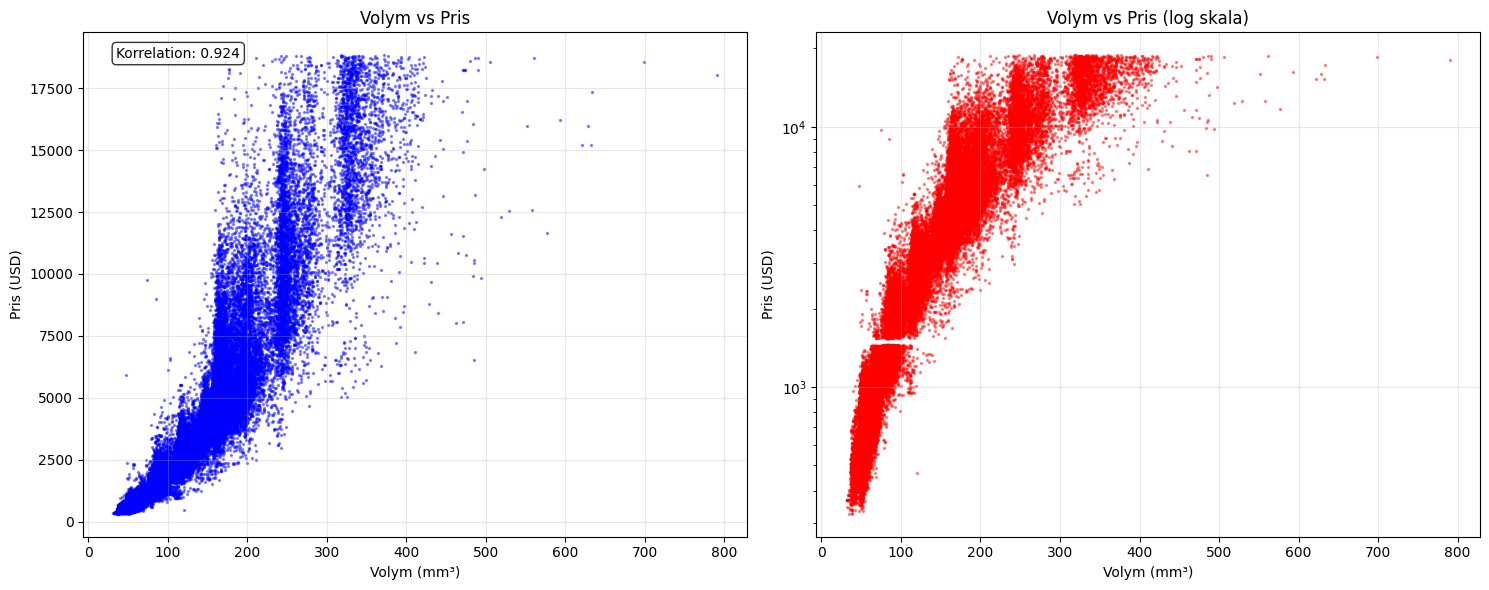

💡 Volym och pris korrelerar starkt: 0.924


In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.scatter(df['volume'], df['price'], alpha=0.4, s=2, c='blue')
ax1.set_xlabel('Volym (mm³)')
ax1.set_ylabel('Pris (USD)')
ax1.set_title('Volym vs Pris')
ax1.grid(True, alpha=0.3)


volume_price_corr = df['volume'].corr(df['price'])
ax1.text(0.05, 0.95, f'Korrelation: {volume_price_corr:.3f}', 
         transform=ax1.transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


ax2.scatter(df['volume'], df['price'], alpha=0.4, s=2, c='red')
ax2.set_xlabel('Volym (mm³)')
ax2.set_ylabel('Pris (USD)')
ax2.set_yscale('log')
ax2.set_title('Volym vs Pris (log skala)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"💡 Volym och pris korrelerar starkt: {volume_price_corr:.3f}")

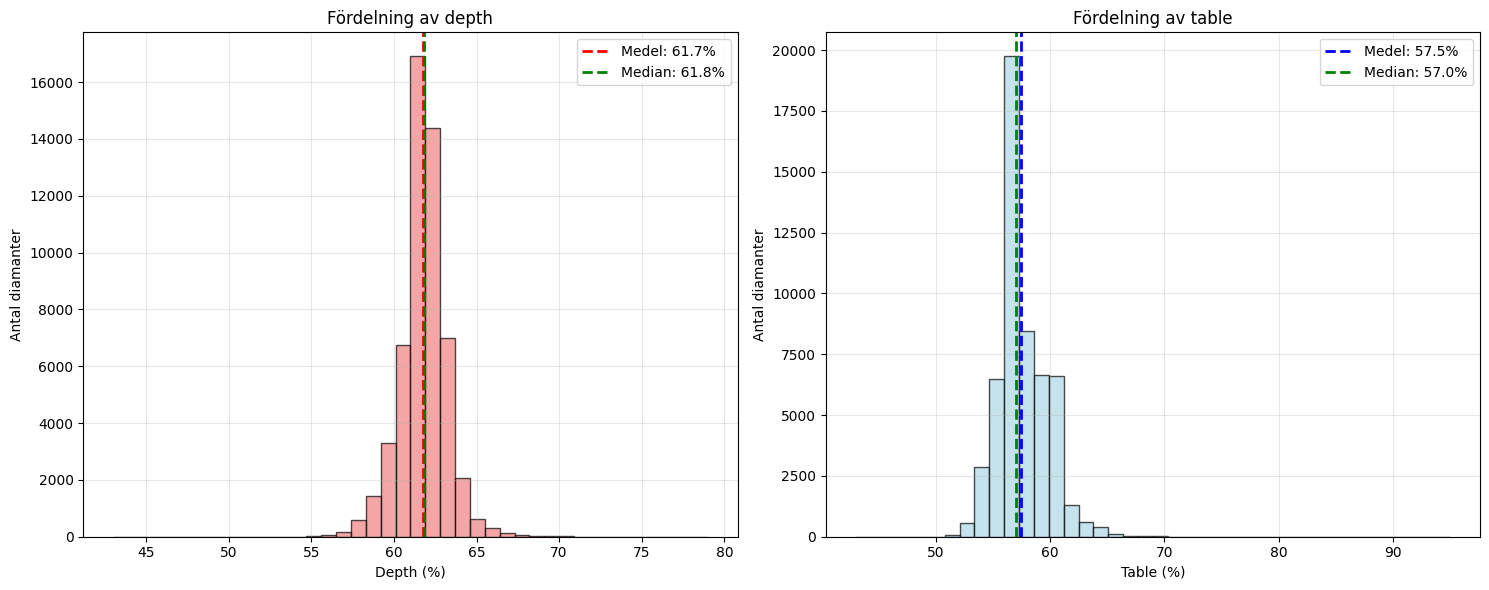

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.hist(df['depth'], bins=40, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.set_xlabel('Depth (%)')
ax1.set_ylabel('Antal diamanter')
ax1.set_title('Fördelning av depth')
ax1.axvline(df['depth'].mean(), color='red', linestyle='--', linewidth=2, label=f'Medel: {df["depth"].mean():.1f}%')
ax1.axvline(df['depth'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["depth"].median():.1f}%')
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2.hist(df['table'], bins=40, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_xlabel('Table (%)')
ax2.set_ylabel('Antal diamanter')
ax2.set_title('Fördelning av table')
ax2.axvline(df['table'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Medel: {df["table"].mean():.1f}%')
ax2.axvline(df['table'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["table"].median():.1f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [142]:
print(f"📊 DEPTH ANALYS:")
print(f"   • Spridning: {df['depth'].min():.1f}% - {df['depth'].max():.1f}%")
print(f"   • Standardavvikelse: {df['depth'].std():.2f}%")
print(f"   • Idealt intervall (±1 std): {df['depth'].mean()-df['depth'].std():.1f}% - {df['depth'].mean()+df['depth'].std():.1f}%")

print(f"\n📊 TABLE ANALYS:")
print(f"   • Spridning: {df['table'].min():.1f}% - {df['table'].max():.1f}%")
print(f"   • Standardavvikelse: {df['table'].std():.2f}%")
print(f"   • Idealt intervall (±1 std): {df['table'].mean()-df['table'].std():.1f}% - {df['table'].mean()+df['table'].std():.1f}%")


📊 DEPTH ANALYS:
   • Spridning: 43.0% - 79.0%
   • Standardavvikelse: 1.43%
   • Idealt intervall (±1 std): 60.3% - 63.2%

📊 TABLE ANALYS:
   • Spridning: 43.0% - 95.0%
   • Standardavvikelse: 2.23%
   • Idealt intervall (±1 std): 55.2% - 59.7%


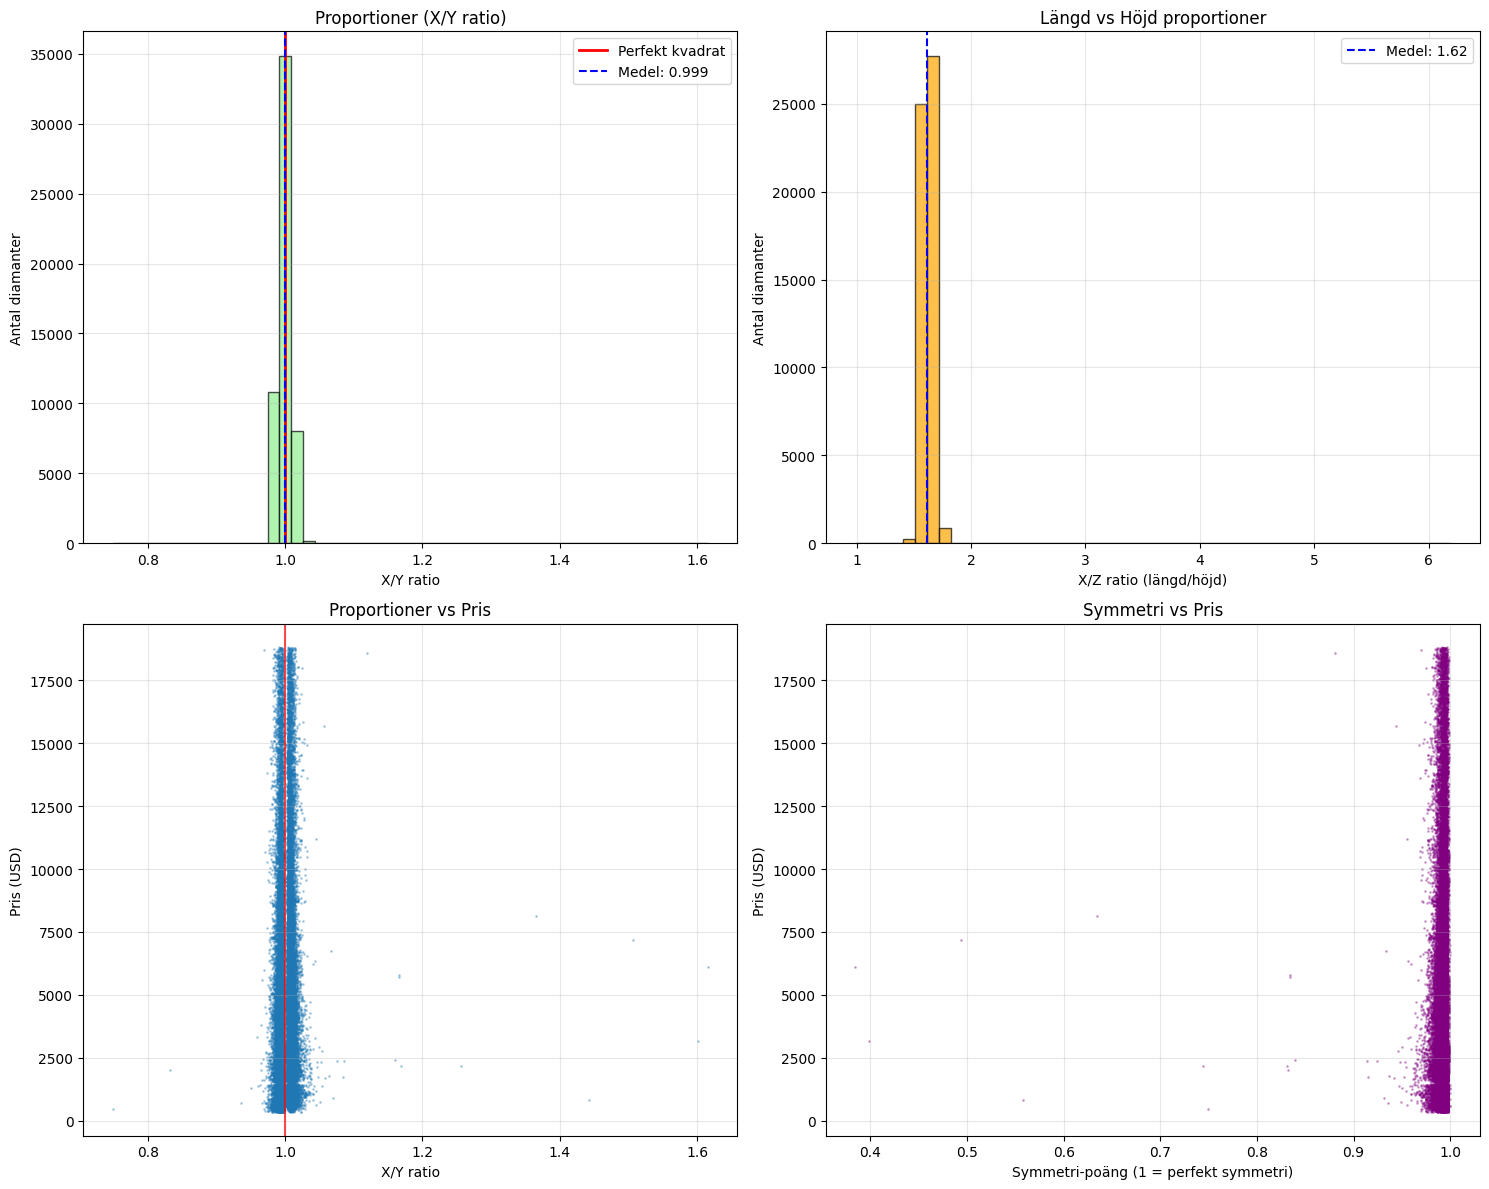

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0,0].hist(df['aspect_ratio_xy'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].set_xlabel('X/Y ratio')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].set_title('Proportioner (X/Y ratio)')
axes[0,0].axvline(1.0, color='red', linestyle='-', linewidth=2, label='Perfekt kvadrat')
axes[0,0].axvline(df['aspect_ratio_xy'].mean(), color='blue', linestyle='--', 
                  label=f'Medel: {df["aspect_ratio_xy"].mean():.3f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)


axes[0,1].hist(df['aspect_ratio_xz'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_xlabel('X/Z ratio (längd/höjd)')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].set_title('Längd vs Höjd proportioner')
axes[0,1].axvline(df['aspect_ratio_xz'].mean(), color='blue', linestyle='--',
                  label=f'Medel: {df["aspect_ratio_xz"].mean():.2f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


axes[1,0].scatter(df['aspect_ratio_xy'], df['price'], alpha=0.3, s=1)
axes[1,0].set_xlabel('X/Y ratio')
axes[1,0].set_ylabel('Pris (USD)')
axes[1,0].set_title('Proportioner vs Pris')
axes[1,0].axvline(1.0, color='red', linestyle='-', alpha=0.7)
axes[1,0].grid(True, alpha=0.3)


df['symmetry_score'] = 1 - abs(df['aspect_ratio_xy'] - 1)
axes[1,1].scatter(df['symmetry_score'], df['price'], alpha=0.3, s=1, c='purple')
axes[1,1].set_xlabel('Symmetri-poäng (1 = perfekt symmetri)')
axes[1,1].set_ylabel('Pris (USD)')
axes[1,1].set_title('Symmetri vs Pris')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

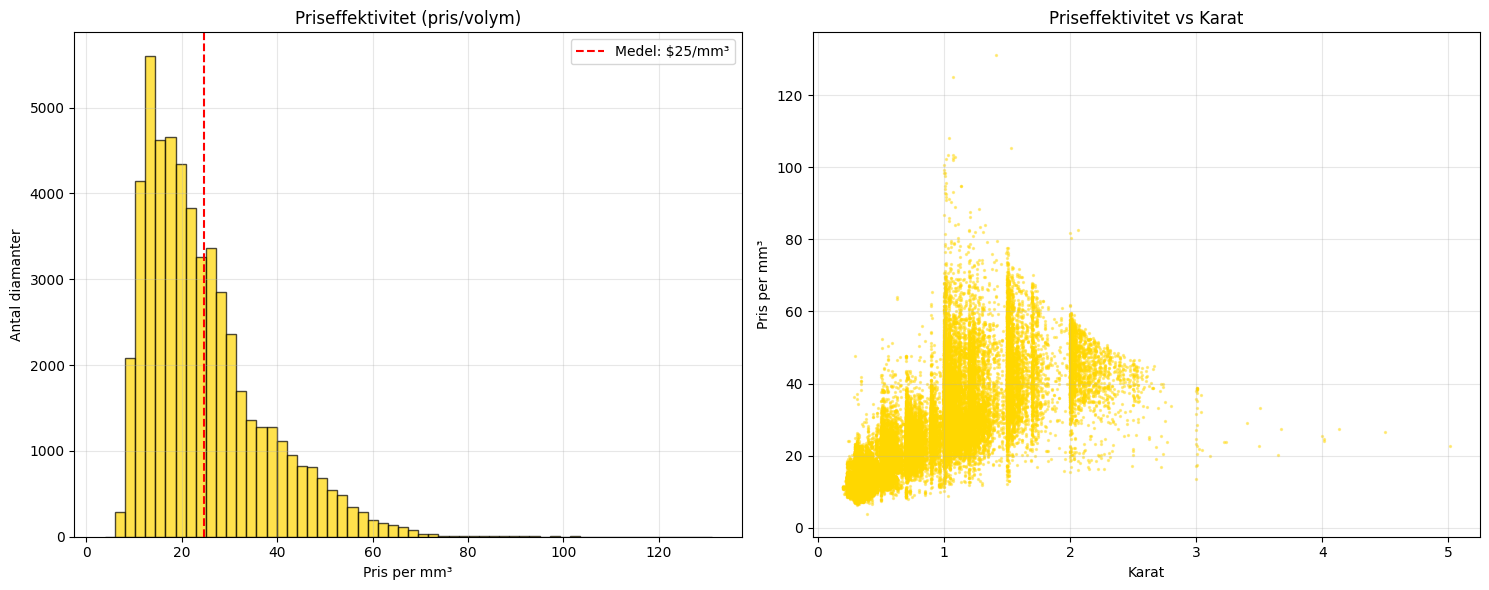

 MEST PRISEFFEKTIVA DIAMANTER (lägst pris per mm³):
       carat        cut color clarity  price  price_per_volume
34282   0.39    Premium     H     SI2    468          3.882307
4       0.31       Good     J     SI2    335          6.452576
31962   0.43    Premium     H      I1    452          6.569724
15      0.32    Premium     E      I1    345          6.649484
13      0.31      Ideal     J     SI2    344          6.677570
28285   0.33      Ideal     J     SI2    366          6.702512
10      0.30       Good     J     SI1    339          6.826598
24      0.31  Very Good     J     SI1    353          6.867275
28271   0.32       Good     D      I1    361          6.878409
23      0.31  Very Good     J     SI1    353          6.927957

 MINST PRISEFFEKTIVA DIAMANTER (högst pris per mm³):
       carat        cut color clarity  price  price_per_volume
21654   1.41      Ideal     H     VS1   9752        131.044864
14635   1.07      Ideal     F     SI1   5909        125.068053
27635   1.04

In [144]:

df['price_per_volume'] = df['price'] / df['volume']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.hist(df['price_per_volume'], bins=60, alpha=0.7, color='gold', edgecolor='black')
ax1.set_xlabel('Pris per mm³')
ax1.set_ylabel('Antal diamanter')
ax1.set_title('Priseffektivitet (pris/volym)')
ax1.axvline(df['price_per_volume'].mean(), color='red', linestyle='--', 
            label=f'Medel: ${df["price_per_volume"].mean():.0f}/mm³')
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2.scatter(df['carat'], df['price_per_volume'], alpha=0.4, s=2, c='gold')
ax2.set_xlabel('Karat')
ax2.set_ylabel('Pris per mm³')
ax2.set_title('Priseffektivitet vs Karat')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


most_efficient = df.nsmallest(10, 'price_per_volume')[['carat', 'cut', 'color', 'clarity', 'price', 'price_per_volume']]
least_efficient = df.nlargest(10, 'price_per_volume')[['carat', 'cut', 'color', 'clarity', 'price', 'price_per_volume']]

print(" MEST PRISEFFEKTIVA DIAMANTER (lägst pris per mm³):")
print(most_efficient)

print("\n MINST PRISEFFEKTIVA DIAMANTER (högst pris per mm³):")
print(least_efficient)

In [145]:
# Korrelationer med geometriska mått
geom_correlations = df[['volume', 'surface_area_approx', 'aspect_ratio_xy', 'depth', 'table', 'price']].corr()['price'].sort_values(ascending=False)

print("Korrelationer med pris (geometriska mått):")
for var, corr in geom_correlations.items():
    if var != 'price':
        print(f"  • {var}: {corr:.3f}")


perfect_symmetry = df[abs(df['aspect_ratio_xy'] - 1) < 0.01]
very_asymmetric = df[abs(df['aspect_ratio_xy'] - 1) > 0.2]

print(f"\n GEOMETRISKA INSIGHTS:")
print(f"  • {len(perfect_symmetry)} diamanter är nästan perfekt symmetriska (x/y ≈ 1)")
print(f"  • {len(very_asymmetric)} diamanter är mycket asymmetriska (x/y avviker >20%)")
print(f"  • Genomsnittlig volym ökar exponentiellt med karat")
print(f"  • Depth och table har svag korrelation med pris")


optimal_depth = df[(df['depth'] >= 58) & (df['depth'] <= 65)]
optimal_table = df[(df['table'] >= 54) & (df['table'] <= 60)]
optimal_both = df[(df['depth'] >= 58) & (df['depth'] <= 65) & 
                  (df['table'] >= 54) & (df['table'] <= 60)]

print(f"\n OPTIMALA PROPORTIONER:")
print(f"  • Depth 58-65%: {len(optimal_depth)} diamanter (medelpris: ${optimal_depth['price'].mean():.0f})")
print(f"  • Table 54-60%: {len(optimal_table)} diamanter (medelpris: ${optimal_table['price'].mean():.0f})")
print(f"  • Båda optimala: {len(optimal_both)} diamanter (medelpris: ${optimal_both['price'].mean():.0f})")

print(f"\n Del 4 SLUTSATS:")
print("Geometrin spelar en avgörande roll för diamantens värde!")
print("Volym korrelerar starkt med pris, men proportioner och symmetri påverkar också värdet.")

Korrelationer med pris (geometriska mått):
  • volume: 0.924
  • surface_area_approx: 0.911
  • table: 0.127
  • aspect_ratio_xy: 0.091
  • depth: -0.011

 GEOMETRISKA INSIGHTS:
  • 41977 diamanter är nästan perfekt symmetriska (x/y ≈ 1)
  • 7 diamanter är mycket asymmetriska (x/y avviker >20%)
  • Genomsnittlig volym ökar exponentiellt med karat
  • Depth och table har svag korrelation med pris

 OPTIMALA PROPORTIONER:
  • Depth 58-65%: 52502 diamanter (medelpris: $3922)
  • Table 54-60%: 48298 diamanter (medelpris: $3901)
  • Båda optimala: 47400 diamanter (medelpris: $3892)

 Del 4 SLUTSATS:
Geometrin spelar en avgörande roll för diamantens värde!
Volym korrelerar starkt med pris, men proportioner och symmetri påverkar också värdet.


In [146]:
# Skapa prissegment
def create_price_segments(price):
    if price < 1000:
        return 'Budget (< $1,000)'
    elif price < 2500:
        return 'Mellanklass ($1,000-$2,500)'
    elif price < 5000:
        return 'Premium ($2,500-$5,000)'
    elif price < 10000:
        return 'Lyx ($5,000-$10,000)'
    else:
        return 'Ultra-lyx (> $10,000)'

df['price_segment'] = df['price'].apply(create_price_segments)

# Skapa karatsegment
def create_carat_segments(carat):
    if carat < 0.5:
        return 'Liten (< 0.5ct)'
    elif carat < 1.0:
        return 'Medium (0.5-1.0ct)'
    elif carat < 1.5:
        return 'Stor (1.0-1.5ct)'
    elif carat < 2.0:
        return 'Mycket stor (1.5-2.0ct)'
    else:
        return 'Enormt (> 2.0ct)'

df['carat_segment'] = df['carat'].apply(create_carat_segments)

# Skapa kvalitetssegment baserat på cut
def create_quality_segments(cut):
    if cut in ['Fair', 'Good']:
        return 'Standard kvalitet'
    elif cut == 'Very Good':
        return 'Hög kvalitet'
    elif cut == 'Premium':
        return 'Premium kvalitet'
    else:  # Ideal
        return 'Ideal kvalitet'

df['quality_segment'] = df['cut'].apply(create_quality_segments)

print("📊 Segment skapade:")
print(f"• Prissegment: {df['price_segment'].nunique()} kategorier")
print(f"• Karatsegment: {df['carat_segment'].nunique()} kategorier") 
print(f"• Kvalitetssegment: {df['quality_segment'].nunique()} kategorier")


📊 Segment skapade:
• Prissegment: 5 kategorier
• Karatsegment: 5 kategorier
• Kvalitetssegment: 4 kategorier


In [173]:
price_segment_analysis = df.groupby('price_segment').agg({
    'price': ['mean', 'median', 'count', 'std'],
    'carat': 'mean',
    'cut': lambda x: x.value_counts().index[0],  # Mest vanliga cut
    'color': lambda x: x.value_counts().index[0],  # Mest vanliga färg
    'clarity': lambda x: x.value_counts().index[0]  # Mest vanliga klarhet
}).round(2)

price_segment_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Prisstd', 'Medelkarat', 'Vanligaste_Cut', 'Vanligaste_Color', 'Vanligaste_Clarity']

print(price_segment_analysis)

# Beräkna procentuell fördelning
price_segment_pct = df['price_segment'].value_counts(normalize=True) * 100
print(f"\n Procentuell fördelning av prissegment:")
for segment, pct in price_segment_pct.items():
    count = df['price_segment'].value_counts()[segment]
    print(f"  • {segment}: {pct:.1f}% ({count:,} diamanter)")

                             Medelpris  Medianpris  Antal  Prisstd  \
price_segment                                                        
Budget (< $1,000)               707.88       708.0  14499   161.53   
Lyx ($5,000-$10,000)           6930.38      6653.0   9501  1410.10   
Mellanklass ($1,000-$2,500)    1646.44      1649.0  13036   451.01   
Premium ($2,500-$5,000)        3708.86      3723.0  11667   739.78   
Ultra-lyx (> $10,000)         13636.26     13232.5   5214  2516.75   

                             Medelkarat Vanligaste_Cut Vanligaste_Color  \
price_segment                                                             
Budget (< $1,000)                  0.33          Ideal                G   
Lyx ($5,000-$10,000)               1.21          Ideal                G   
Mellanklass ($1,000-$2,500)        0.55          Ideal                E   
Premium ($2,500-$5,000)            0.90          Ideal                F   
Ultra-lyx (> $10,000)              1.74        Premium     

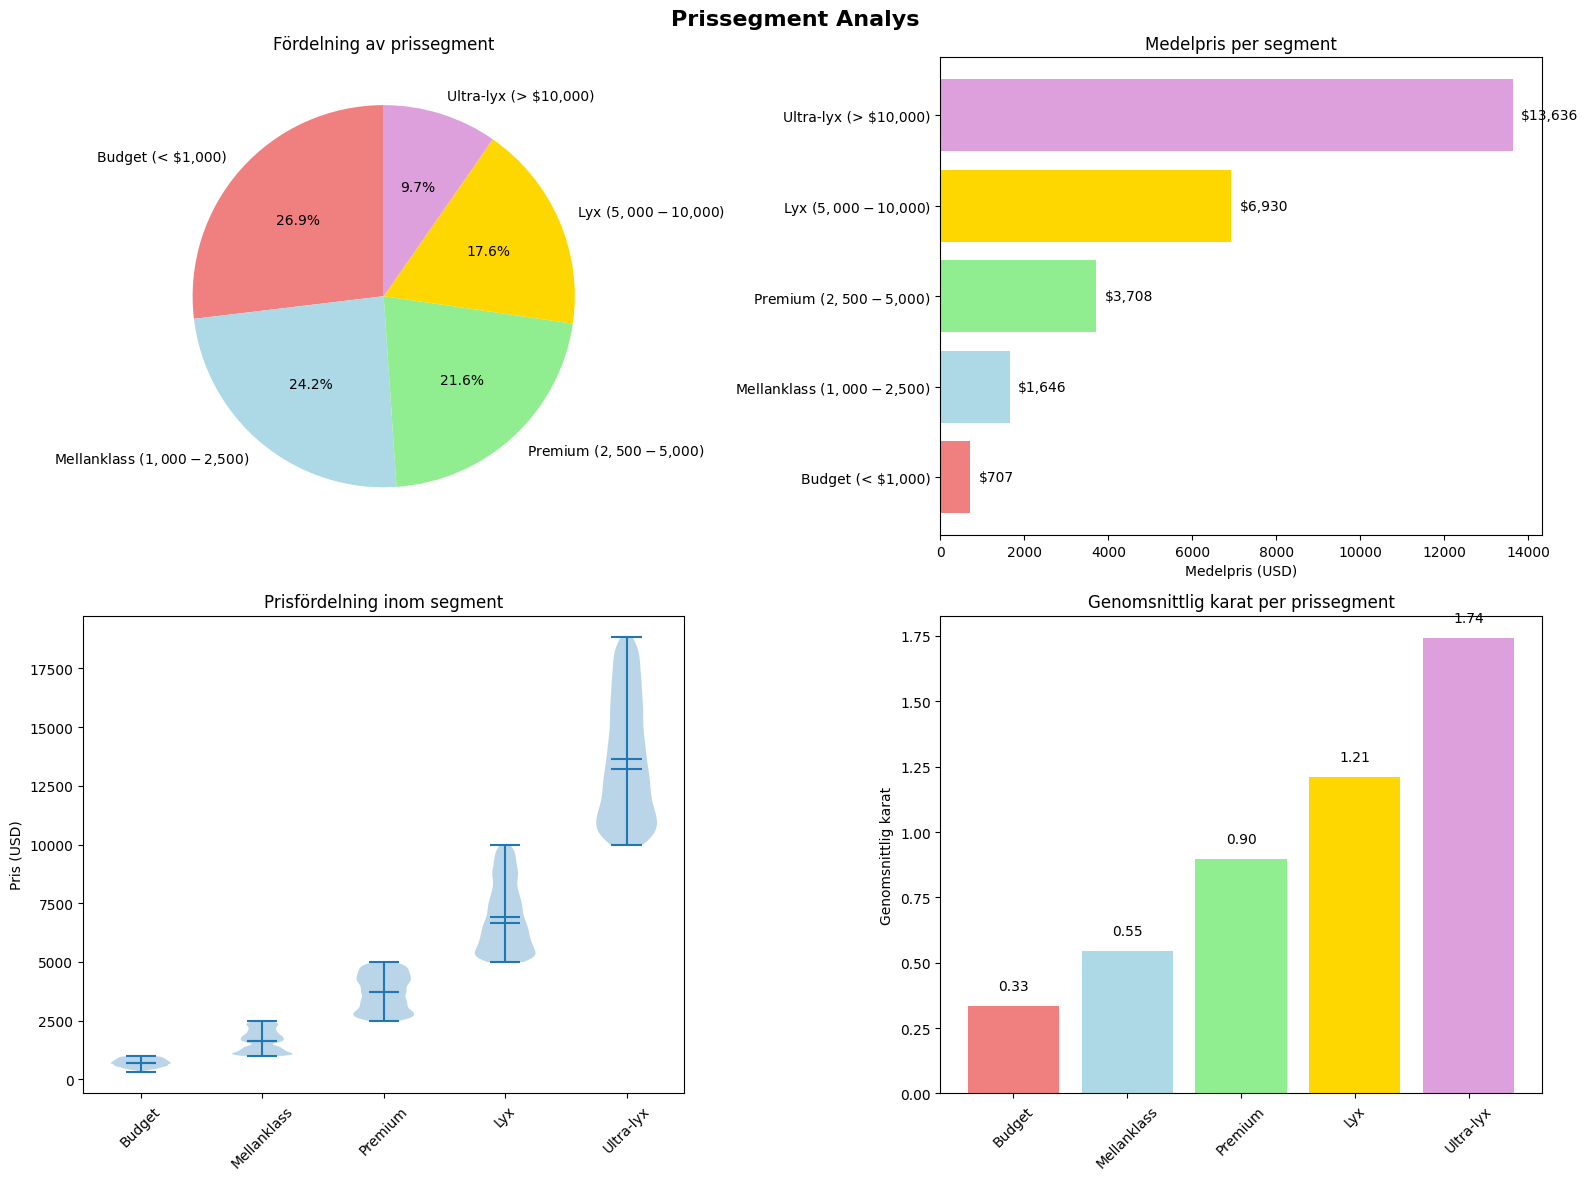

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Prissegment Analys', fontsize=16, fontweight='bold')


price_seg_counts = df['price_segment'].value_counts()
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum']
wedges, texts, autotexts = axes[0,0].pie(price_seg_counts.values, labels=price_seg_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
axes[0,0].set_title('Fördelning av prissegment')


price_means = df.groupby('price_segment')['price'].mean().sort_values(ascending=True)
bars = axes[0,1].barh(price_means.index, price_means.values, color=colors)
axes[0,1].set_xlabel('Medelpris (USD)')
axes[0,1].set_title('Medelpris per segment')

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,1].text(width + 200, bar.get_y() + bar.get_height()/2,
                   f'${int(width):,}', ha='left', va='center')


price_data = [df[df['price_segment'] == segment]['price'] for segment in price_seg_counts.index]
parts = axes[1,0].violinplot(price_data, range(len(price_seg_counts)), showmeans=True, showmedians=True)
axes[1,0].set_xticks(range(len(price_seg_counts)))
axes[1,0].set_xticklabels([seg.split(' (')[0] for seg in price_seg_counts.index], rotation=45)
axes[1,0].set_ylabel('Pris (USD)')
axes[1,0].set_title('Prisfördelning inom segment')


carat_means = df.groupby('price_segment')['carat'].mean().reindex(price_seg_counts.index)
axes[1,1].bar(range(len(carat_means)), carat_means.values, color=colors)
axes[1,1].set_xticks(range(len(carat_means)))
axes[1,1].set_xticklabels([seg.split(' (')[0] for seg in carat_means.index], rotation=45)
axes[1,1].set_ylabel('Genomsnittlig karat')
axes[1,1].set_title('Genomsnittlig karat per prissegment')


for i, v in enumerate(carat_means.values):
    axes[1,1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [174]:
print("\n Karatsegment Analys:")

carat_segment_analysis = df.groupby('carat_segment').agg({
    'price': ['mean', 'median', 'count'],
    'carat': ['mean', 'min', 'max'],
    'color': lambda x: x.value_counts().index[0],  # Mest vanliga färg
    'cut': lambda x: x.value_counts().index[0]     # Mest vanliga cut
}).round(2)

carat_segment_analysis.columns = ['Medelpris', 'Medianpris', 'Antal', 'Medelkarat', 'Min_karat', 'Max_karat', 'Vanligaste_Color', 'Vanligaste_Cut']

# Sortera enligt naturlig ordning
carat_order = ['Liten (< 0.5ct)', 'Medium (0.5-1.0ct)', 'Stor (1.0-1.5ct)', 'Mycket stor (1.5-2.0ct)', 'Enormt (> 2.0ct)']
carat_segment_analysis = carat_segment_analysis.reindex(carat_order)

print(carat_segment_analysis)


df['price_per_carat'] = df['price'] / df['carat']
price_per_carat_by_segment = df.groupby('carat_segment')['price_per_carat'].mean().reindex(carat_order)

print(f"\n Pris per karat för varje segment:")
for segment, price_per_carat in price_per_carat_by_segment.items():
    if pd.notna(price_per_carat):
        print(f"  • {segment}: ${price_per_carat:.0f}/karat")


 Karatsegment Analys:
                         Medelpris  Medianpris  Antal  Medelkarat  Min_karat  \
carat_segment                                                                  
Liten (< 0.5ct)             792.40       765.0  17674        0.34        0.2   
Medium (0.5-1.0ct)         2495.83      2323.0  17202        0.68        0.5   
Stor (1.0-1.5ct)           6140.47      5599.0  12815        1.11        1.0   
Mycket stor (1.5-2.0ct)   10898.22     10609.0   4079        1.58        1.5   
Enormt (> 2.0ct)          14839.65     15261.0   2147        2.13        2.0   

                         Max_karat Vanligaste_Color Vanligaste_Cut  
carat_segment                                                       
Liten (< 0.5ct)               0.49                E          Ideal  
Medium (0.5-1.0ct)            0.99                E          Ideal  
Stor (1.0-1.5ct)              1.49                G          Ideal  
Mycket stor (1.5-2.0ct)       1.99                H        Premium  
En

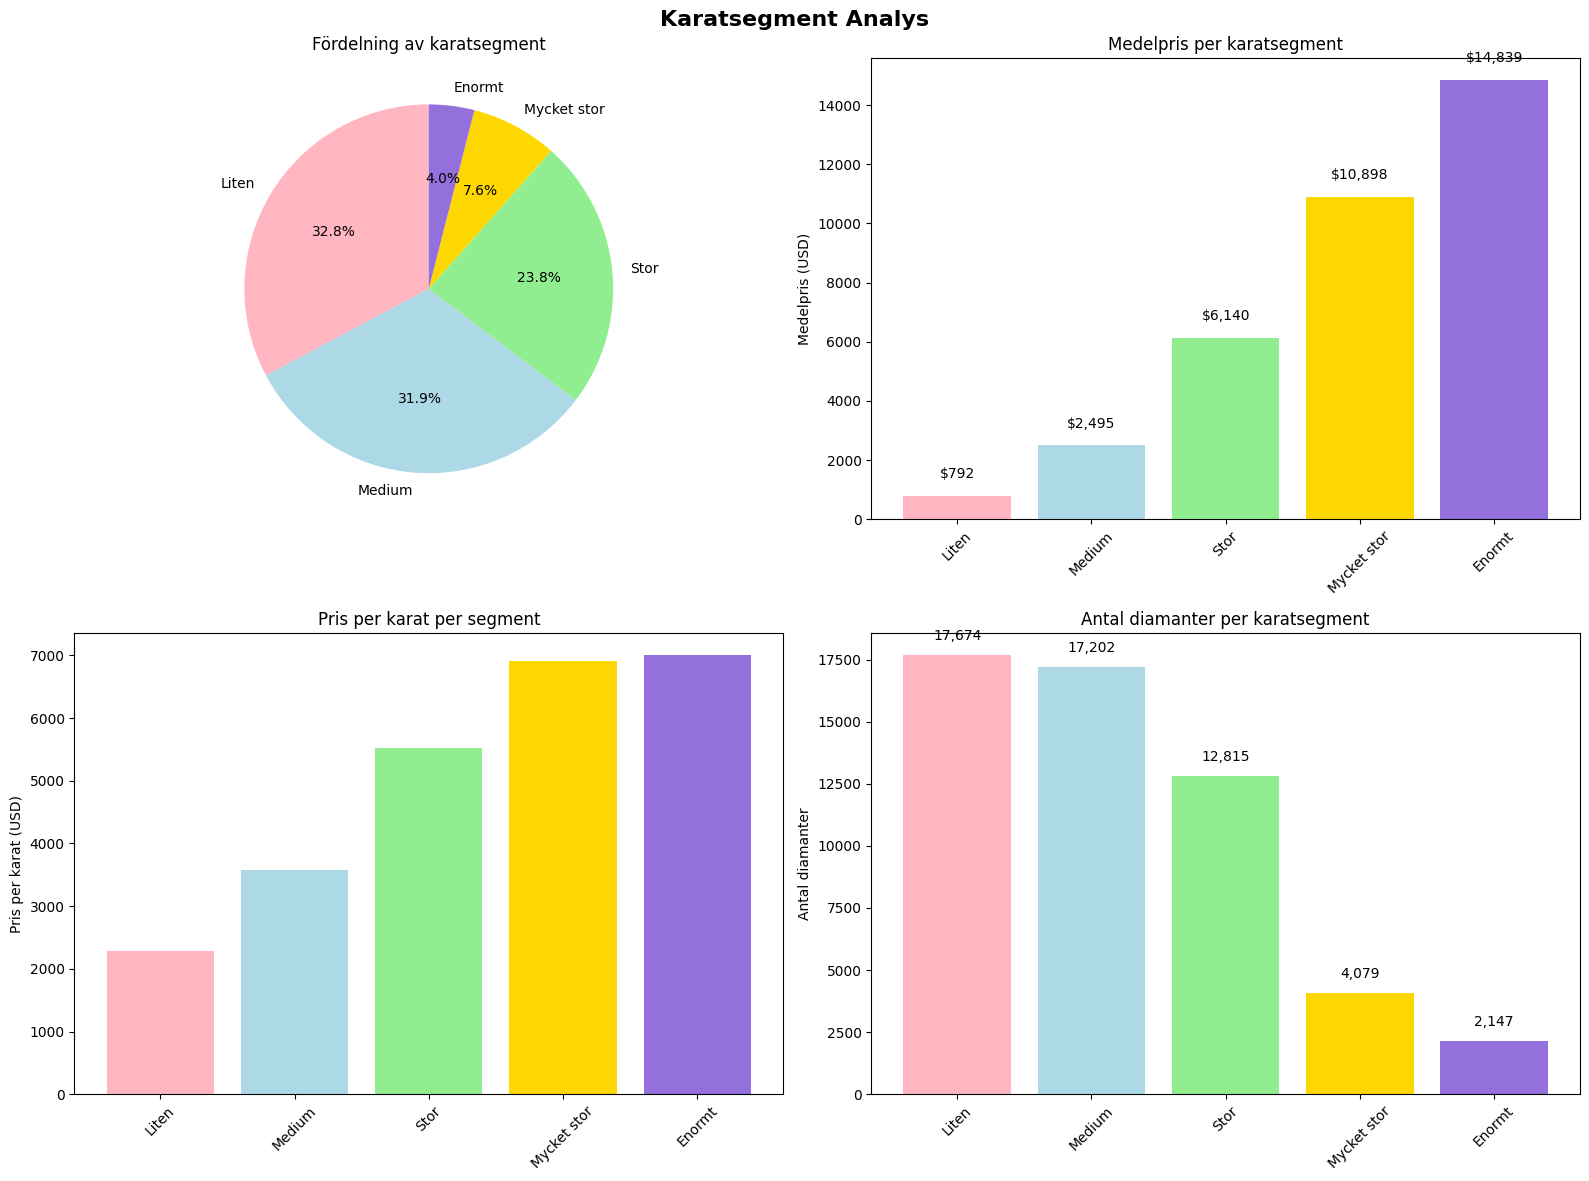

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Karatsegment Analys', fontsize=16, fontweight='bold')

# Pie chart för karatsegment fördelning
carat_seg_counts = df['carat_segment'].value_counts().reindex(carat_order)
carat_colors = ['lightpink', 'lightblue', 'lightgreen', 'gold', 'mediumpurple']
axes[0,0].pie(carat_seg_counts.values, labels=[seg.split(' (')[0] for seg in carat_seg_counts.index], 
              autopct='%1.1f%%', startangle=90, colors=carat_colors)
axes[0,0].set_title('Fördelning av karatsegment')

# Medelpris per karatsegment
carat_price_means = df.groupby('carat_segment')['price'].mean().reindex(carat_order)
axes[0,1].bar(range(len(carat_price_means)), carat_price_means.values, color=carat_colors)
axes[0,1].set_xticks(range(len(carat_price_means)))
axes[0,1].set_xticklabels([seg.split(' (')[0] for seg in carat_price_means.index], rotation=45)
axes[0,1].set_ylabel('Medelpris (USD)')
axes[0,1].set_title('Medelpris per karatsegment')

# Lägg till värden på staplarna
for i, v in enumerate(carat_price_means.values):
    if pd.notna(v):
        axes[0,1].text(i, v + 500, f'${int(v):,}', ha='center', va='bottom')

# Pris per karat
axes[1,0].bar(range(len(price_per_carat_by_segment)), price_per_carat_by_segment.values, color=carat_colors)
axes[1,0].set_xticks(range(len(price_per_carat_by_segment)))
axes[1,0].set_xticklabels([seg.split(' (')[0] for seg in price_per_carat_by_segment.index], rotation=45)
axes[1,0].set_ylabel('Pris per karat (USD)')
axes[1,0].set_title('Pris per karat per segment')

# Antal diamanter per segment
axes[1,1].bar(range(len(carat_seg_counts)), carat_seg_counts.values, color=carat_colors)
axes[1,1].set_xticks(range(len(carat_seg_counts)))
axes[1,1].set_xticklabels([seg.split(' (')[0] for seg in carat_seg_counts.index], rotation=45)
axes[1,1].set_ylabel('Antal diamanter')
axes[1,1].set_title('Antal diamanter per karatsegment')

# Lägg till värden på staplarna
for i, v in enumerate(carat_seg_counts.values):
    axes[1,1].text(i, v + 500, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


🔄 CROSS-SEGMENT ANALYS:
-------------------------
Antal diamanter per kombination:
carat_segment                Enormt (> 2.0ct)  Liten (< 0.5ct)  \
price_segment                                                    
Budget (< $1,000)                           0            14349   
Lyx ($5,000-$10,000)                      115                0   
Mellanklass ($1,000-$2,500)                 0             3323   
Premium ($2,500-$5,000)                     0                2   
Ultra-lyx (> $10,000)                    2032                0   

carat_segment                Medium (0.5-1.0ct)  Mycket stor (1.5-2.0ct)  \
price_segment                                                              
Budget (< $1,000)                           150                        0   
Lyx ($5,000-$10,000)                        249                     1684   
Mellanklass ($1,000-$2,500)                9660                        0   
Premium ($2,500-$5,000)                    7143                       46 

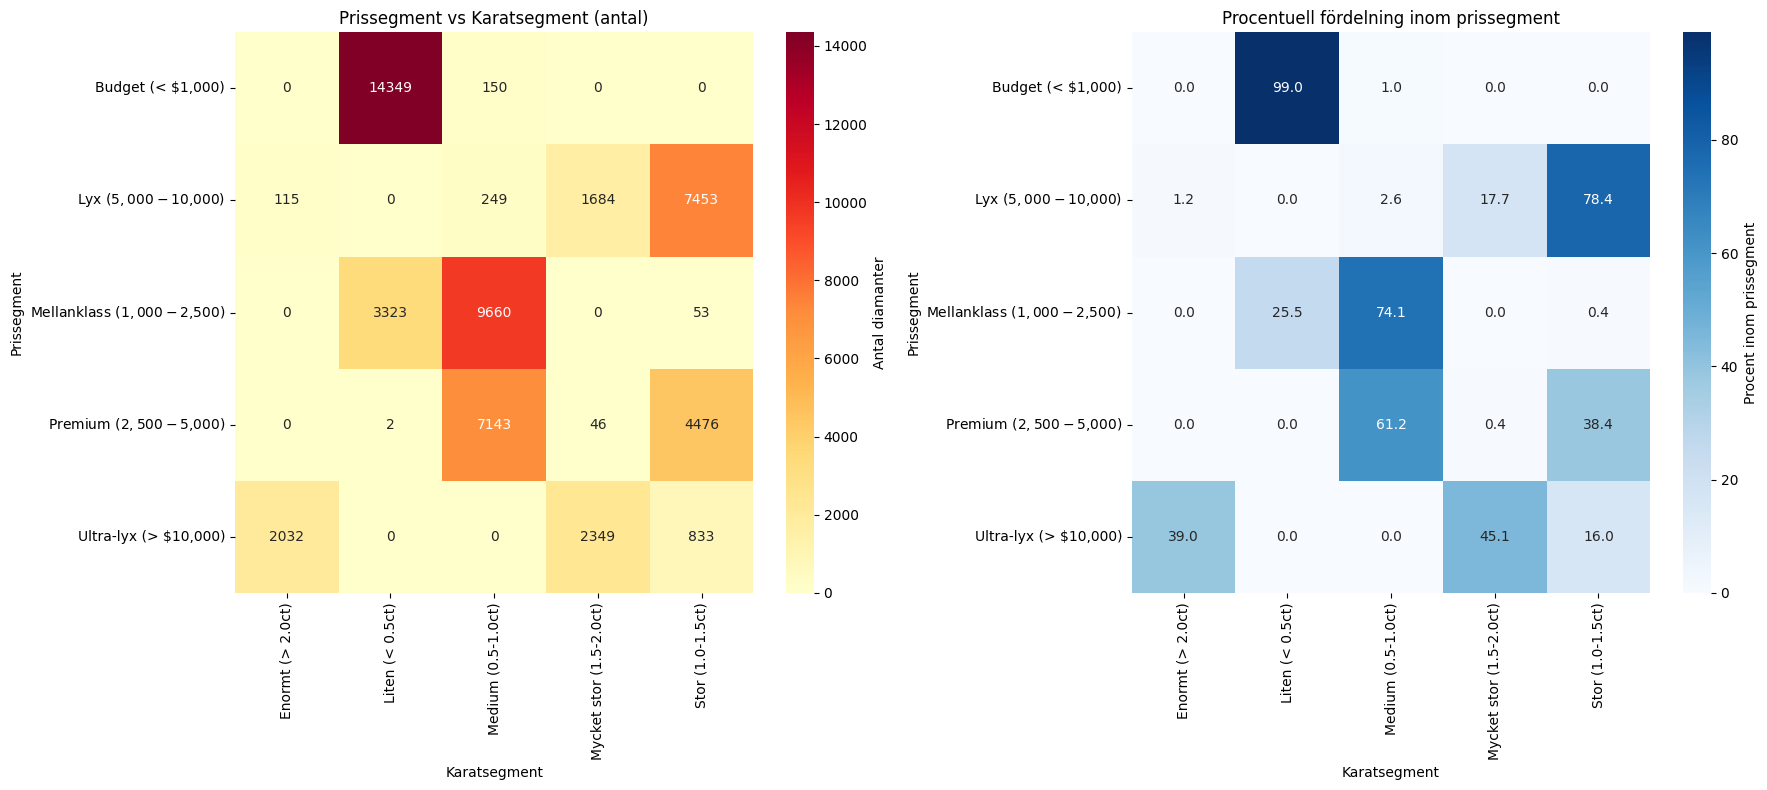

In [151]:
print("\n🔄 CROSS-SEGMENT ANALYS:")
print("-" * 25)

# Skapa crosstab
segment_crosstab = pd.crosstab(df['price_segment'], df['carat_segment'])
segment_crosstab_pct = pd.crosstab(df['price_segment'], df['carat_segment'], normalize='index') * 100

print("Antal diamanter per kombination:")
print(segment_crosstab)

print(f"\nProcentuell fördelning inom varje prissegment:")
print(segment_crosstab_pct.round(1))

# Visualisera crosstab
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap: antal diamanter
sns.heatmap(segment_crosstab, annot=True, fmt='d', ax=ax1, cmap='YlOrRd', cbar_kws={'label': 'Antal diamanter'})
ax1.set_title('Prissegment vs Karatsegment (antal)')
ax1.set_xlabel('Karatsegment')
ax1.set_ylabel('Prissegment')

# Heatmap: procentuell fördelning
sns.heatmap(segment_crosstab_pct, annot=True, fmt='.1f', ax=ax2, cmap='Blues', cbar_kws={'label': 'Procent inom prissegment'})
ax2.set_title('Procentuell fördelning inom prissegment')
ax2.set_xlabel('Karatsegment')
ax2.set_ylabel('Prissegment')

plt.tight_layout()
plt.show()



 KVALITET PER PRISSEGMENT:
------------------------------
Kvalitetsfördelning per prissegment (antal):
quality_segment              Hög kvalitet  Ideal kvalitet  Premium kvalitet  \
price_segment                                                                 
Budget (< $1,000)                    3240            6838              3200   
Lyx ($5,000-$10,000)                 2222            3218              2914   
Mellanklass ($1,000-$2,500)          2574            6016              2896   
Premium ($2,500-$5,000)              2920            3706              2969   
Ultra-lyx (> $10,000)                1124            1769              1800   

quality_segment              Standard kvalitet  
price_segment                                   
Budget (< $1,000)                         1221  
Lyx ($5,000-$10,000)                      1147  
Mellanklass ($1,000-$2,500)               1550  
Premium ($2,500-$5,000)                   2072  
Ultra-lyx (> $10,000)                      521  

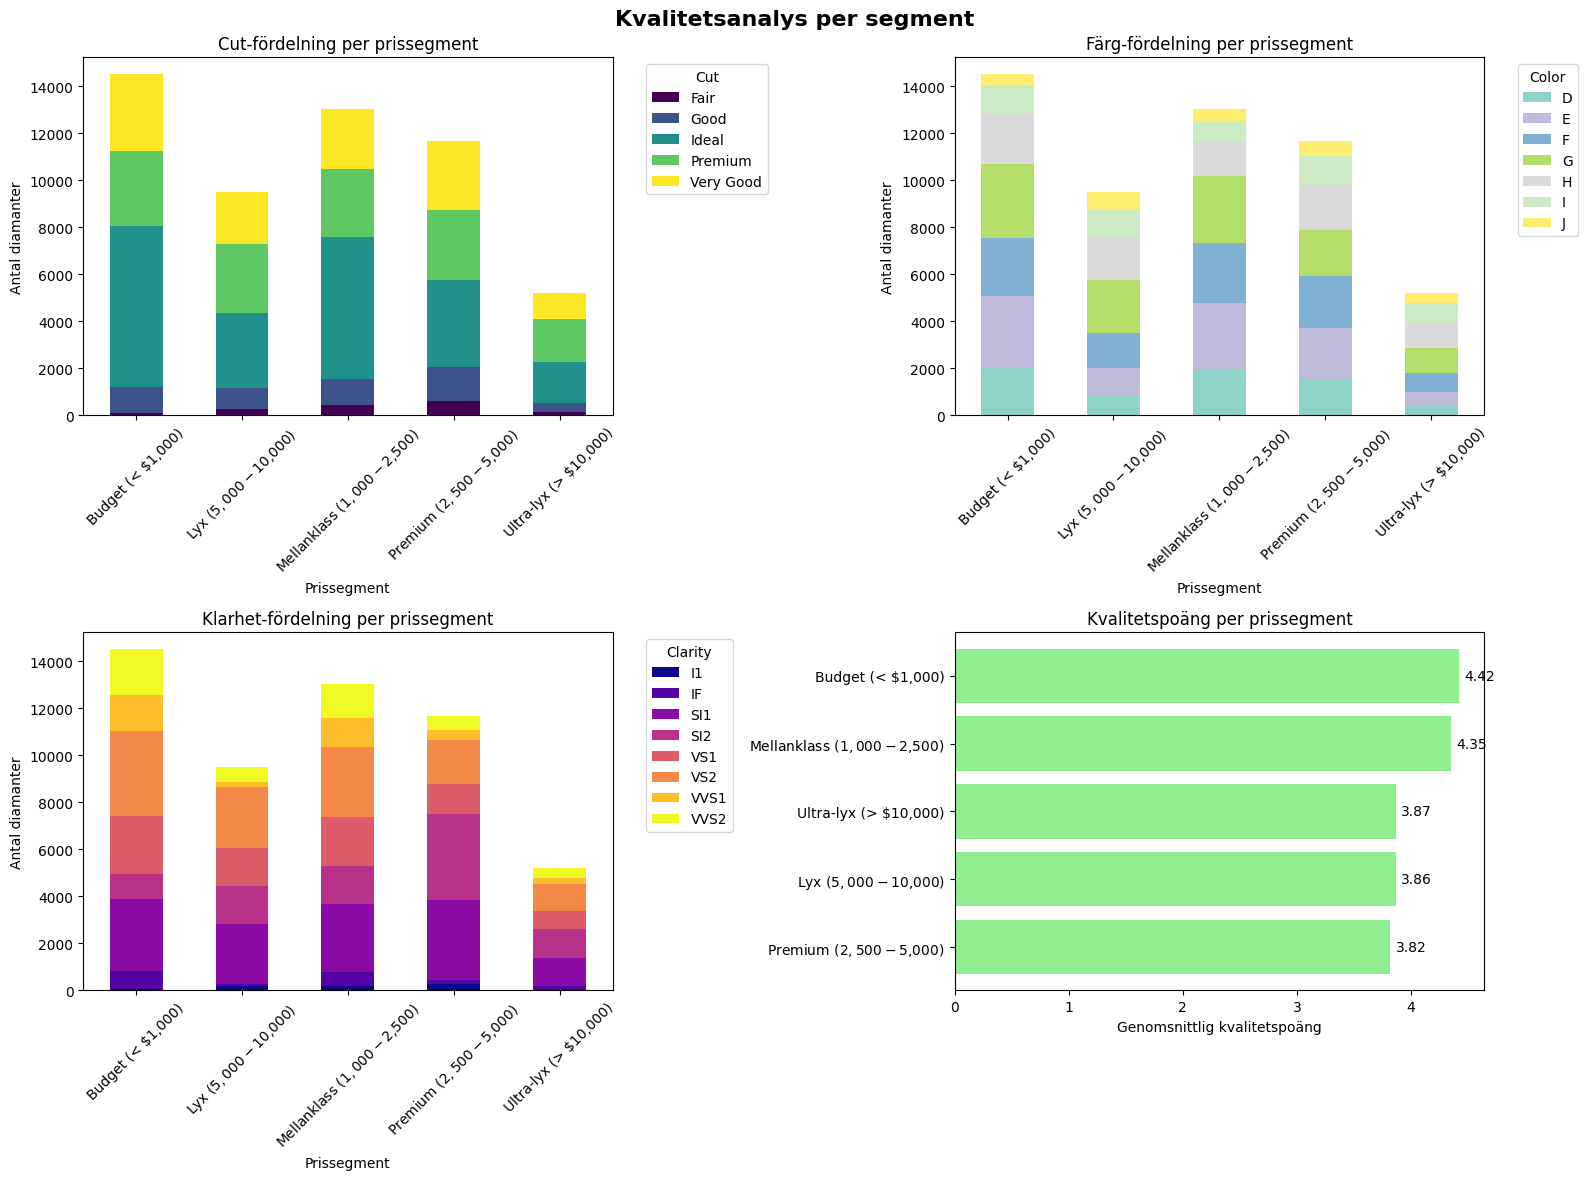

In [152]:
print("\n KVALITET PER PRISSEGMENT:")
print("-" * 30)


quality_price_crosstab = pd.crosstab(df['price_segment'], df['quality_segment'])
quality_price_pct = pd.crosstab(df['price_segment'], df['quality_segment'], normalize='index') * 100

print("Kvalitetsfördelning per prissegment (antal):")
print(quality_price_crosstab)

print(f"\nKvalitetsfördelning per prissegment (procent):")
print(quality_price_pct.round(1))


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Kvalitetsanalys per segment', fontsize=16, fontweight='bold')


cut_price_crosstab = pd.crosstab(df['price_segment'], df['cut'])
cut_price_crosstab.plot(kind='bar', ax=axes[0,0], stacked=True, colormap='viridis')
axes[0,0].set_title('Cut-fördelning per prissegment')
axes[0,0].set_xlabel('Prissegment')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')


color_price_crosstab = pd.crosstab(df['price_segment'], df['color'])
color_price_crosstab.plot(kind='bar', ax=axes[0,1], stacked=True, colormap='Set3')
axes[0,1].set_title('Färg-fördelning per prissegment')
axes[0,1].set_xlabel('Prissegment')
axes[0,1].set_ylabel('Antal diamanter')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')


clarity_price_crosstab = pd.crosstab(df['price_segment'], df['clarity'])
clarity_price_crosstab.plot(kind='bar', ax=axes[1,0], stacked=True, colormap='plasma')
axes[1,0].set_title('Klarhet-fördelning per prissegment')
axes[1,0].set_xlabel('Prissegment')
axes[1,0].set_ylabel('Antal diamanter')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')


cut_scores = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_scores = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_scores = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

df['cut_score'] = df['cut'].map(cut_scores)
df['color_score'] = df['color'].map(color_scores)
df['clarity_score'] = df['clarity'].map(clarity_scores)
df['total_quality_score'] = (df['cut_score'] + df['color_score'] + df['clarity_score']) / 3

quality_by_segment = df.groupby('price_segment')['total_quality_score'].mean().sort_values(ascending=True)
axes[1,1].barh(quality_by_segment.index, quality_by_segment.values, color='lightgreen')
axes[1,1].set_xlabel('Genomsnittlig kvalitetspoäng')
axes[1,1].set_title('Kvalitetspoäng per prissegment')


for i, v in enumerate(quality_by_segment.values):
    axes[1,1].text(v + 0.05, i, f'{v:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


 MARKNADSSEGMENT SAMMANFATTNING:
----------------------------------------

 Budget (< $1,000):
   • Antal: 14,499 (26.9% av marknaden)
   • Medelpris: $708
   • Medelkarat: 0.33
   • Typisk profil: Ideal, G, VS2
   • Kvalitetspoäng: 4.42/5
   • Pris/karat: $2,126

 Premium ($2,500-$5,000):
   • Antal: 11,667 (21.6% av marknaden)
   • Medelpris: $3,709
   • Medelkarat: 0.90
   • Typisk profil: Ideal, F, SI2
   • Kvalitetspoäng: 3.82/5
   • Pris/karat: $4,160

 Lyx ($5,000-$10,000):
   • Antal: 9,501 (17.6% av marknaden)
   • Medelpris: $6,930
   • Medelkarat: 1.21
   • Typisk profil: Ideal, G, VS2
   • Kvalitetspoäng: 3.86/5
   • Pris/karat: $5,822

 Ultra-lyx (> $10,000):
   • Antal: 5,214 (9.7% av marknaden)
   • Medelpris: $13,636
   • Medelkarat: 1.74
   • Typisk profil: Premium, G, SI2
   • Kvalitetspoäng: 3.87/5
   • Pris/karat: $8,044

 Mellanklass ($1,000-$2,500):
   • Antal: 13,036 (24.2% av marknaden)
   • Medelpris: $1,646
   • Medelkarat: 0.55
   • Typisk profil: Ideal, E, 

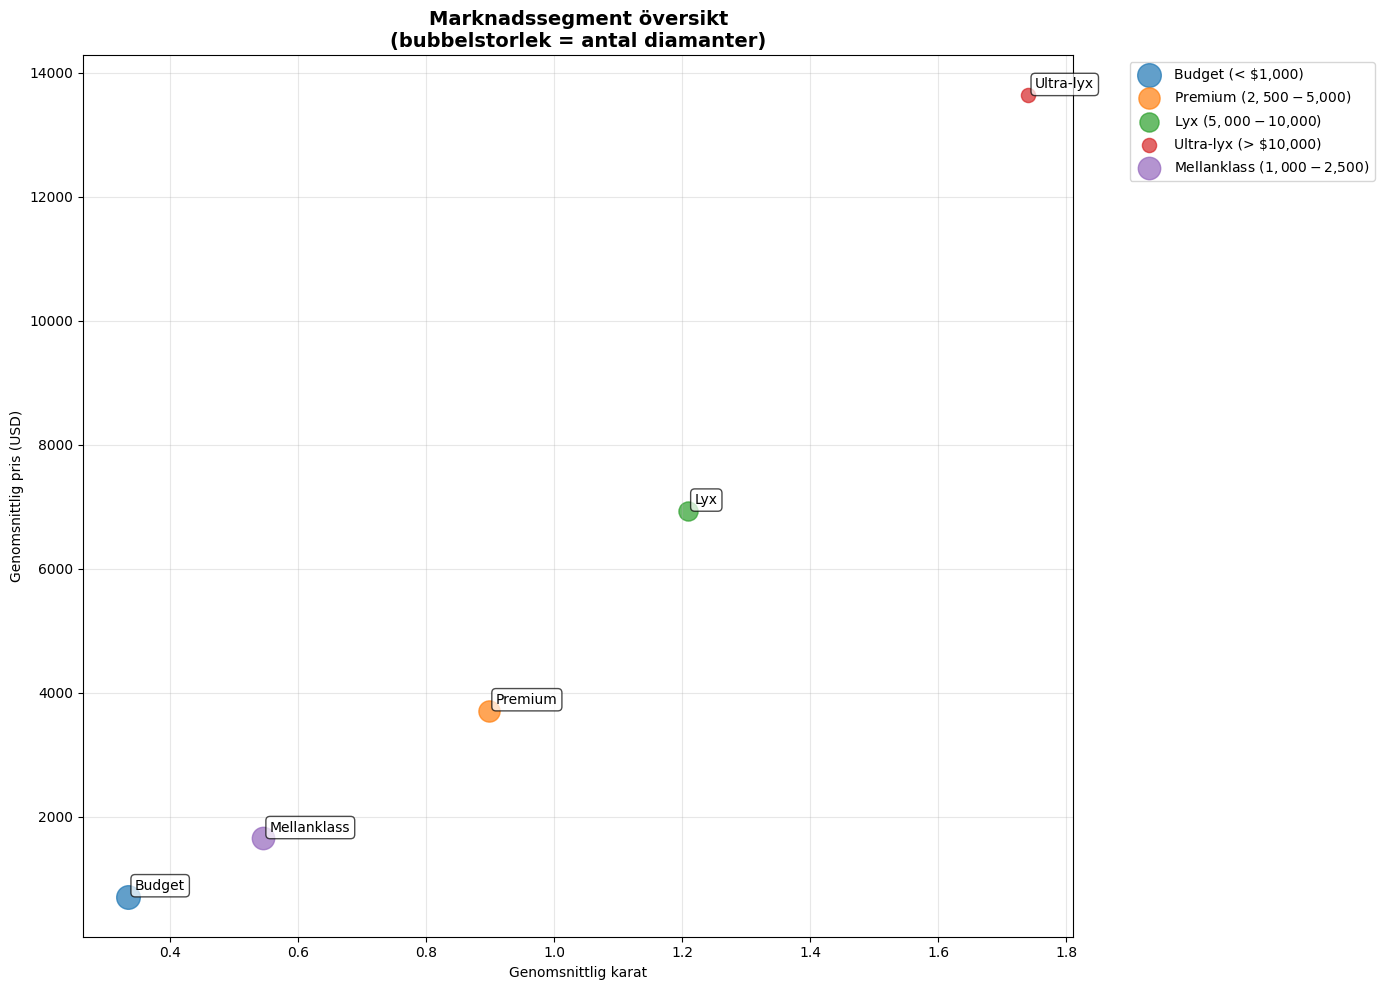


 MARKNADSMÖNSTER:
• Budget-segmentet dominerar volymen men låg lönsamhet
• Premium-segmentet balanserar volym och pris bra
• Ultra-lyx är nischmarknad med få men värdefulla kunder
• Kvalitetspoäng korrelerar positivt med prissegment
• Större diamanter hamnar naturligt i dyrare segment


In [153]:
print("\n MARKNADSSEGMENT SAMMANFATTNING:")
print("-" * 40)

# Skapa en omfattande sammanfattning
segment_summary = {}

for price_seg in df['price_segment'].unique():
    seg_data = df[df['price_segment'] == price_seg]
    
    segment_summary[price_seg] = {
        'antal': len(seg_data),
        'procent': len(seg_data) / len(df) * 100,
        'medelpris': seg_data['price'].mean(),
        'medelkarat': seg_data['carat'].mean(),
        'vanligaste_cut': seg_data['cut'].mode()[0],
        'vanligaste_color': seg_data['color'].mode()[0],
        'vanligaste_clarity': seg_data['clarity'].mode()[0],
        'kvalitetspoäng': seg_data['total_quality_score'].mean(),
        'pris_per_karat': seg_data['price_per_carat'].mean()
    }


for segment, stats in segment_summary.items():
    print(f"\n {segment}:")
    print(f"   • Antal: {stats['antal']:,} ({stats['procent']:.1f}% av marknaden)")
    print(f"   • Medelpris: ${stats['medelpris']:,.0f}")
    print(f"   • Medelkarat: {stats['medelkarat']:.2f}")
    print(f"   • Typisk profil: {stats['vanligaste_cut']}, {stats['vanligaste_color']}, {stats['vanligaste_clarity']}")
    print(f"   • Kvalitetspoäng: {stats['kvalitetspoäng']:.2f}/5")
    print(f"   • Pris/karat: ${stats['pris_per_karat']:,.0f}")


plt.figure(figsize=(14, 10))

for i, (segment, stats) in enumerate(segment_summary.items()):
    x = stats['medelkarat']
    y = stats['medelpris']
    size = stats['antal'] / 50  
    plt.scatter(x, y, s=size, alpha=0.7, label=segment)
    
    
    plt.annotate(segment.split(' (')[0], 
                xy=(x, y), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

plt.xlabel('Genomsnittlig karat')
plt.ylabel('Genomsnittlig pris (USD)')
plt.title('Marknadssegment översikt\n(bubbelstorlek = antal diamanter)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(f"\n MARKNADSMÖNSTER:")
print("• Budget-segmentet dominerar volymen men låg lönsamhet")
print("• Premium-segmentet balanserar volym och pris bra")  
print("• Ultra-lyx är nischmarknad med få men värdefulla kunder")
print("• Kvalitetspoäng korrelerar positivt med prissegment")
print("• Större diamanter hamnar naturligt i dyrare segment")

In [154]:
print("\n Del 6: VÄRDEFULLA INSIKTER")
print("-" * 40)





if 'cut_score' not in df.columns:
    cut_scores = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
    color_scores = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
    clarity_scores = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
    
    df['cut_score'] = df['cut'].map(cut_scores)
    df['color_score'] = df['color'].map(color_scores)
    df['clarity_score'] = df['clarity'].map(clarity_scores)


df['quality_score'] = (
    df['cut_score'] * 0.4 +      
    df['color_score'] * 0.3 +    
    df['clarity_score'] * 0.3   
) / 7 * 5  


if 'price_per_carat' not in df.columns:
    df['price_per_carat'] = df['price'] / df['carat']


df['value_score'] = df['quality_score'] / (df['price_per_carat'] / 1000)


df['size_adjusted_value'] = df['value_score'] * np.log(df['carat'] + 1)


rarity_factors = {
    'cut': df['cut'].value_counts(normalize=True),
    'color': df['color'].value_counts(normalize=True),
    'clarity': df['clarity'].value_counts(normalize=True)
}

df['rarity_score'] = (
    (1 - df['cut'].map(rarity_factors['cut'])) * 0.3 +
    (1 - df['color'].map(rarity_factors['color'])) * 0.4 +
    (1 - df['clarity'].map(rarity_factors['clarity'])) * 0.3
)

print("\n Värdesystem:")
print(f" Värdepoäng: {df['value_score'].min():.2f} - {df['value_score'].max():.2f}")
print(f" Kvalitetspoäng: {df['quality_score'].min():.2f} - {df['quality_score'].max():.2f}")
print(f" Raritet-poäng: {df['rarity_score'].min():.2f} - {df['rarity_score'].max():.2f}")



 Del 6: VÄRDEFULLA INSIKTER
----------------------------------------

 Värdesystem:
 Värdepoäng: 0.14 - 2.59
 Kvalitetspoäng: 0.71 - 4.64
 Raritet-poäng: 0.72 - 0.97


In [155]:
print("\n BÄSTA VALUE-FOR-MONEY DIAMANTER:")
print("-" * 35)


top_value = df.nlargest(15, 'value_score')[['carat', 'cut', 'color', 'clarity', 'price', 'value_score', 'quality_score']].round(2)
print(" TOP 15 BÄSTA VÄRDE FÖR PENGARNA:")
print(top_value)


print(f"\n🔍 MÖNSTER I BÄSTA VÄRDENA:")
top_value_cut = top_value['cut'].value_counts()
top_value_color = top_value['color'].value_counts()
top_value_clarity = top_value['clarity'].value_counts()

print(f"• Vanligaste cut i topp 15: {top_value_cut.index[0]} ({top_value_cut.iloc[0]} st)")
print(f"• Vanligaste color i topp 15: {top_value_color.index[0]} ({top_value_color.iloc[0]} st)")
print(f"• Vanligaste clarity i topp 15: {top_value_clarity.index[0]} ({top_value_clarity.iloc[0]} st)")
print(f"• Genomsnittlig karat i topp 15: {top_value['carat'].mean():.2f}")
print(f"• Genomsnittligt pris i topp 15: ${top_value['price'].mean():,.0f}")


print(f"\n BÄSTA VÄRDE PER PRISSEGMENT:")
for segment in df['price_segment'].unique():
    seg_data = df[df['price_segment'] == segment]
    if len(seg_data) > 0:
        best_value_in_segment = seg_data.nlargest(3, 'value_score')[['carat', 'cut', 'color', 'clarity', 'price', 'value_score']]
        print(f"\n{segment}:")
        print(best_value_in_segment.round(2))



 BÄSTA VALUE-FOR-MONEY DIAMANTER:
-----------------------------------
 TOP 15 BÄSTA VÄRDE FÖR PENGARNA:
       carat      cut color clarity  price  value_score  quality_score
10020   0.34    Ideal     D      I1    413         2.59           3.14
10021   0.34    Ideal     D      I1    413         2.59           3.14
15      0.32  Premium     E      I1    345         2.45           2.64
6719    0.30    Ideal     D     SI2    413         2.44           3.36
26683   0.33    Ideal     E     SI2    427         2.43           3.14
26684   0.33    Ideal     E     SI2    427         2.43           3.14
30945   0.32    Ideal     D     SI2    449         2.39           3.36
37266   0.34    Ideal     D     SI2    481         2.37           3.36
32300   0.32    Ideal     D     SI2    454         2.37           3.36
26675   0.30    Ideal     D     SI2    426         2.36           3.36
26682   0.32    Ideal     E     SI2    427         2.36           3.14
26685   0.32    Ideal     E     SI2    427 

In [156]:
print("\n ÖVER- OCH UNDERPRISSATTA DIAMANTER:")
print("-" * 40)


print(" Analyserar prismönster...")


def calculate_reference_price(row):
    
    similar_diamonds = df[
        (abs(df['carat'] - row['carat']) <= 0.2) &  
        (df['cut_score'] == row['cut_score']) &        
        (df['color_score'] == row['color_score']) &  
        (df['clarity_score'] == row['clarity_score']) 
    ]
    
    if len(similar_diamonds) >= 5:
        
        reference_price = similar_diamonds['price'].median()
    else:
        
        base_price_per_carat = df.groupby(['cut_score', 'color_score', 'clarity_score'])['price_per_carat'].median()
        key = (row['cut_score'], row['color_score'], row['clarity_score'])
        
        if key in base_price_per_carat.index:
            reference_price = base_price_per_carat[key] * row['carat']
        else:
            
            avg_price_per_carat = df['price_per_carat'].median()
            quality_multiplier = row['quality_score'] / df['quality_score'].median()
            reference_price = avg_price_per_carat * row['carat'] * quality_multiplier
    
    return reference_price


df['reference_price'] = df.apply(calculate_reference_price, axis=1)
df['price_deviation'] = df['price'] - df['reference_price']
df['price_deviation_pct'] = (df['price_deviation'] / df['reference_price']) * 100


underpriced = df[df['price_deviation_pct'] < -15].nsmallest(10, 'price_deviation_pct')
print(" MEST UNDERPRISSATTA DIAMANTER (potentiella fynd):")
if len(underpriced) > 0:
    print(underpriced[['carat', 'cut', 'color', 'clarity', 'price', 'reference_price', 'price_deviation_pct']].round(1))
else:
    print("Inga kraftigt underprissatta diamanter hittades.")


overpriced = df[df['price_deviation_pct'] > 15].nlargest(10, 'price_deviation_pct')
print(f"\n MEST ÖVERPRISSATTA DIAMANTER (undvik dessa):")
if len(overpriced) > 0:
    print(overpriced[['carat', 'cut', 'color', 'clarity', 'price', 'reference_price', 'price_deviation_pct']].round(1))
else:
    print("Inga kraftigt överprissatta diamanter hittades.")


print(f"\n PRISAVVIKELSE STATISTIK:")
print(f"• {len(df[df['price_deviation_pct'] < -10])} diamanter är underprissatta (>10% under referens)")
print(f"• {len(df[df['price_deviation_pct'] > 10])} diamanter är överprissatta (>10% över referens)")
print(f"• Genomsnittlig prisavvikelse: {df['price_deviation_pct'].mean():.1f}%")
print(f"• Största fynd: {df['price_deviation_pct'].min():.1f}% under referenspris")
print(f"• Största överpris: {df['price_deviation_pct'].max():.1f}% över referenspris")



 ÖVER- OCH UNDERPRISSATTA DIAMANTER:
----------------------------------------
 Analyserar prismönster...
 MEST UNDERPRISSATTA DIAMANTER (potentiella fynd):
       carat        cut color clarity  price  reference_price  \
41831    0.3       Good     D      IF   1252           4778.1   
4        0.3       Good     J     SI2    335           1108.7   
49619    0.5       Good     D      IF   2139           6868.6   
39278    0.4       Good     J     SI2    490           1537.8   
40780    0.3    Premium     D      IF   1167           3427.6   
40363    0.3    Premium     D      IF   1130           3317.1   
28271    0.3       Good     D      I1    361           1044.2   
56       0.3    Premium     J     SI2    405           1157.1   
47991    0.3    Premium     J      IF    533           1503.0   
40829    0.3  Very Good     D      IF   1171           3264.7   

       price_deviation_pct  
41831                -73.8  
4                    -69.8  
49619                -68.9  
39278      

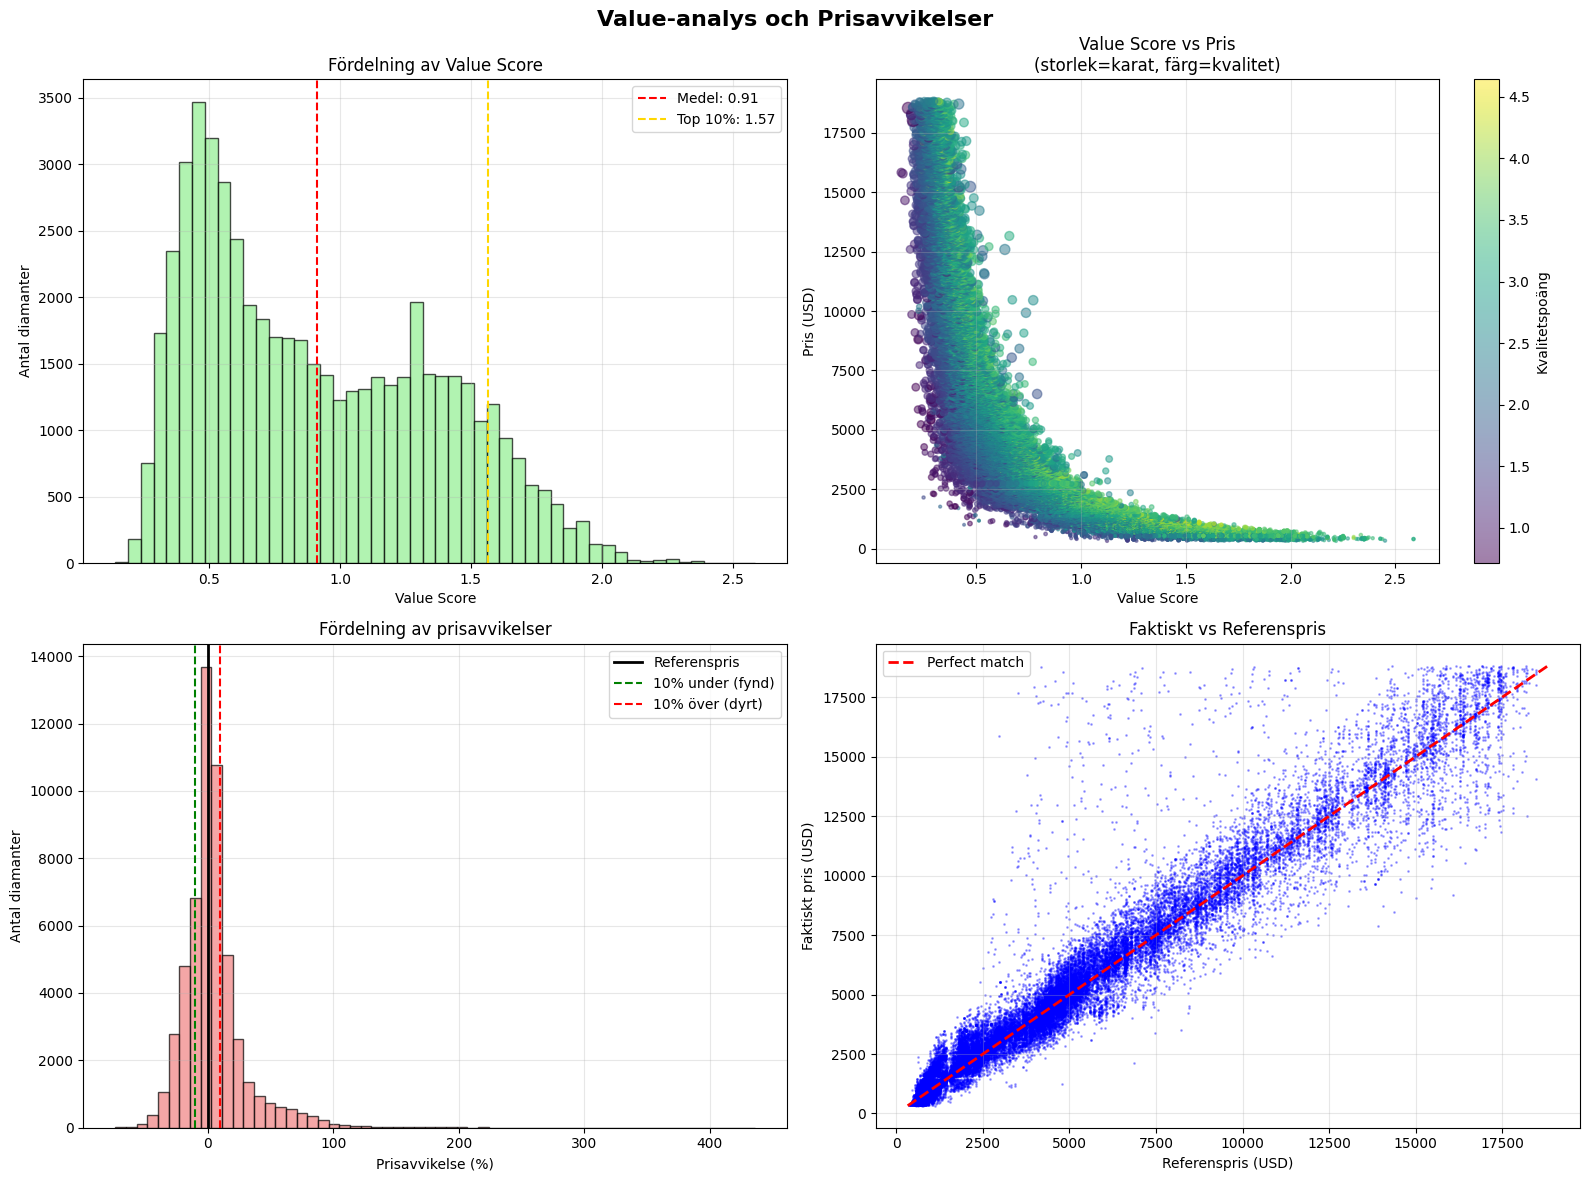

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Value-analys och Prisavvikelser', fontsize=16, fontweight='bold')


axes[0,0].hist(df['value_score'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].set_xlabel('Value Score')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].set_title('Fördelning av Value Score')
axes[0,0].axvline(df['value_score'].mean(), color='red', linestyle='--', 
                  label=f'Medel: {df["value_score"].mean():.2f}')
axes[0,0].axvline(df['value_score'].quantile(0.9), color='gold', linestyle='--',
                  label=f'Top 10%: {df["value_score"].quantile(0.9):.2f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)


scatter = axes[0,1].scatter(df['value_score'], df['price'], alpha=0.5, 
                           s=df['carat']*15, c=df['quality_score'], cmap='viridis')
axes[0,1].set_xlabel('Value Score')
axes[0,1].set_ylabel('Pris (USD)')
axes[0,1].set_title('Value Score vs Pris\n(storlek=karat, färg=kvalitet)')
plt.colorbar(scatter, ax=axes[0,1], label='Kvalitetspoäng')
axes[0,1].grid(True, alpha=0.3)


axes[1,0].hist(df['price_deviation_pct'], bins=60, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_xlabel('Prisavvikelse (%)')
axes[1,0].set_ylabel('Antal diamanter')
axes[1,0].set_title('Fördelning av prisavvikelser')
axes[1,0].axvline(0, color='black', linestyle='-', linewidth=2, label='Referenspris')
axes[1,0].axvline(-10, color='green', linestyle='--', label='10% under (fynd)')
axes[1,0].axvline(10, color='red', linestyle='--', label='10% över (dyrt)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)


axes[1,1].scatter(df['reference_price'], df['price'], alpha=0.3, s=1, color='blue')
min_price = min(df['price'].min(), df['reference_price'].min())
max_price = max(df['price'].max(), df['reference_price'].max())
axes[1,1].plot([min_price, max_price], [min_price, max_price], 'r--', linewidth=2, label='Perfect match')
axes[1,1].set_xlabel('Referenspris (USD)')
axes[1,1].set_ylabel('Faktiskt pris (USD)')
axes[1,1].set_title('Faktiskt vs Referenspris')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [158]:
print("\n EXTREMA DIAMANTER:")
print("-" * 20)

print(" TOP 10 DYRASTE DIAMANTER:")
most_expensive = df.nlargest(10, 'price')[['carat', 'cut', 'color', 'clarity', 'price', 'quality_score', 'value_score']]
print(most_expensive.round(2))

print(f"\n TOP 10 STÖRSTA DIAMANTER:")
largest = df.nlargest(10, 'carat')[['carat', 'cut', 'color', 'clarity', 'price', 'price_per_carat']]
print(largest.round(2))

print(f"\n TOP 10 HÖGSTA KVALITET:")
highest_quality = df.nlargest(10, 'quality_score')[['carat', 'cut', 'color', 'clarity', 'price', 'quality_score']]
print(highest_quality.round(2))

print(f"\n TOP 10 SÄLLSYNTA DIAMANTER:")
rarest = df.nlargest(10, 'rarity_score')[['carat', 'cut', 'color', 'clarity', 'price', 'rarity_score']]
print(rarest.round(2))

# Analysera extrema diamanter
print(f"\n ANALYS AV EXTREMA DIAMANTER:")
print(f"• Dyraste diamanten kostar: ${df['price'].max():,}")
print(f"• Största diamanten: {df['carat'].max():.2f} karat")
print(f"• Högsta kvalitetspoäng: {df['quality_score'].max():.2f}/5")
print(f"• Bästa value score: {df['value_score'].max():.2f}")
print(f"• Högsta raritet: {df['rarity_score'].max():.3f}")

# Korrelationer mellan extrema värden
print(f"\n KORRELATIONER:")
print(f"• Pris vs Karat: {df['price'].corr(df['carat']):.3f}")
print(f"• Pris vs Kvalitet: {df['price'].corr(df['quality_score']):.3f}")
print(f"• Pris vs Value: {df['price'].corr(df['value_score']):.3f}")
print(f"• Kvalitet vs Raritet: {df['quality_score'].corr(df['rarity_score']):.3f}")

# Hitta outliers i olika kategorier
print(f"\n INTRESSANTA OUTLIERS:")

# Mycket värdefulla små diamanter
small_high_value = df[(df['carat'] < 0.7) & (df['value_score'] > df['value_score'].quantile(0.9))]
print(f"• Små men värdefulla diamanter (<0.7ct, hög value): {len(small_high_value)}")

# Stora men billiga diamanter
large_cheap = df[(df['carat'] > 1.5) & (df['price'] < df['price'].quantile(0.5))]
print(f"• Stora men billiga diamanter (>1.5ct, lågt pris): {len(large_cheap)}")

# Perfekta men billiga
perfect_cheap = df[(df['cut'] == 'Ideal') & (df['color'].isin(['D', 'E'])) & 
                   (df['price'] < df['price'].quantile(0.3))]
print(f"• Perfekt kvalitet men lågt pris: {len(perfect_cheap)}")


 EXTREMA DIAMANTER:
--------------------
 TOP 10 DYRASTE DIAMANTER:
       carat        cut color clarity  price  quality_score  value_score
27749   2.29    Premium     I     VS2  18823           2.43         0.30
27748   2.00  Very Good     G     SI1  18818           2.36         0.25
27747   1.51      Ideal     G      IF  18806           4.00         0.32
27746   2.07      Ideal     G     SI2  18804           2.71         0.30
27745   2.00  Very Good     H     SI1  18803           2.14         0.23
27744   2.29    Premium     I     SI1  18797           2.21         0.27
27742   2.04    Premium     H     SI1  18795           2.43         0.26
27743   2.00    Premium     I     VS1  18795           2.64         0.28
27740   1.71    Premium     F     VS2  18791           3.07         0.28
27741   2.15      Ideal     G     SI2  18791           2.71         0.31

 TOP 10 STÖRSTA DIAMANTER:
       carat        cut color clarity  price  price_per_carat
27415   5.01       Fair     J      I1 

In [159]:
print("\n BUDGET-OPTIMERADE REKOMMENDATIONER:")
print("-" * 40)


budgets = [1000, 2500, 5000, 10000, 20000]

for budget in budgets:
    print(f"\n BUDGET: ${budget:,}")
    print("-" * 25)
    
    
    within_budget = df[df['price'] <= budget]
    
    if len(within_budget) == 0:
        print("   Inga diamanter tillgängliga i denna budget.")
        continue
    
    
    print(f"    {len(within_budget):,} diamanter tillgängliga")
    print(f"    Genomsnittlig karat: {within_budget['carat'].mean():.2f}")
    print(f"    Genomsnittligt pris: ${within_budget['price'].mean():,.0f}")
    
    
    top_values = within_budget.nlargest(5, 'value_score')
    print(f"    Bästa value scores: {top_values['value_score'].min():.2f} - {top_values['value_score'].max():.2f}")
    
   
    most_common_cut = within_budget['cut'].mode().iloc[0] if len(within_budget) > 0 else 'N/A'
    most_common_color = within_budget['color'].mode().iloc[0] if len(within_budget) > 0 else 'N/A'
    most_common_clarity = within_budget['clarity'].mode().iloc[0] if len(within_budget) > 0 else 'N/A'
    
    print(f"    Vanligast: {most_common_cut}, {most_common_color}, {most_common_clarity}")
    
   
    best_value_size = top_values['carat'].mean()
    print(f"    Sweet spot storlek: {best_value_size:.2f} karat")
    
    
    print(f"    Top 3 rekommendationer:")
    recommendations = top_values.head(3)[['carat', 'cut', 'color', 'clarity', 'price', 'value_score']]
    for idx, row in recommendations.iterrows():
        print(f"      {row['carat']:.2f}ct {row['cut']} {row['color']} {row['clarity']} - ${row['price']:,} (value: {row['value_score']:.2f})")



 BUDGET-OPTIMERADE REKOMMENDATIONER:
----------------------------------------

 BUDGET: $1,000
-------------------------
    14,524 diamanter tillgängliga
    Genomsnittlig karat: 0.33
    Genomsnittligt pris: $708
    Bästa value scores: 2.43 - 2.59
    Vanligast: Ideal, G, VS2
    Sweet spot storlek: 0.33 karat
    Top 3 rekommendationer:
      0.34ct Ideal D I1 - $413 (value: 2.59)
      0.34ct Ideal D I1 - $413 (value: 2.59)
      0.32ct Premium E I1 - $345 (value: 2.45)

 BUDGET: $2,500
-------------------------
    27,537 diamanter tillgängliga
    Genomsnittlig karat: 0.43
    Genomsnittligt pris: $1,152
    Bästa value scores: 2.43 - 2.59
    Vanligast: Ideal, G, VS2
    Sweet spot storlek: 0.33 karat
    Top 3 rekommendationer:
      0.34ct Ideal D I1 - $413 (value: 2.59)
      0.34ct Ideal D I1 - $413 (value: 2.59)
      0.32ct Premium E I1 - $345 (value: 2.45)

 BUDGET: $5,000
-------------------------
    39,215 diamanter tillgängliga
    Genomsnittlig karat: 0.57
    Geno

In [160]:
print("\n KÖPSTRATEGI REKOMMENDATIONER:")
print("-" * 35)


print(" FÖR VÄRDEMEDVETNA KÖPARE:")
print("-" * 25)
value_buyers = df[df['value_score'] > df['value_score'].quantile(0.8)]
if len(value_buyers) > 0:
    print(f"• Antal bra alternativ: {len(value_buyers):,}")
    print(f"• Fokusera på cut: {value_buyers['cut'].mode().iloc[0]}")
    print(f"• Optimal färg: {value_buyers['color'].mode().iloc[0]}")
    print(f"• Optimal klarhet: {value_buyers['clarity'].mode().iloc[0]}")
    print(f"• Typisk storlek: {value_buyers['carat'].mean():.2f} karat")
    print(f"• Genomsnittskostnad: ${value_buyers['price'].mean():,.0f}")

print(f"\n FÖR KVALITETSMEDVETNA:")
print("-" * 22)
quality_buyers = df[df['quality_score'] > df['quality_score'].quantile(0.9)]
if len(quality_buyers) > 0:
    print(f"• Antal premium alternativ: {len(quality_buyers):,}")
    print(f"• Dominant cut: {quality_buyers['cut'].mode().iloc[0]}")
    print(f"• Dominant färg: {quality_buyers['color'].mode().iloc[0]}")
    print(f"• Dominant klarhet: {quality_buyers['clarity'].mode().iloc[0]}")
    print(f"• Genomsnittskostnad: ${quality_buyers['price'].mean():,.0f}")

print(f"\n FÖR BUDGETKÖPARE:")
print("-" * 18)
budget_buyers = df[df['price'] < 3000]
budget_good_value = budget_buyers[budget_buyers['value_score'] > budget_buyers['value_score'].median()]
if len(budget_good_value) > 0:
    print(f"• Bra budgetalternativ: {len(budget_good_value):,}")
    print(f"• Rekommenderad cut: {budget_good_value['cut'].mode().iloc[0]}")
    print(f"• Rekommenderad färg: {budget_good_value['color'].mode().iloc[0]}")
    print(f"• Rekommenderad klarhet: {budget_good_value['clarity'].mode().iloc[0]}")
    print(f"• Typisk storlek: {budget_good_value['carat'].mean():.2f} karat")

print(f"\n SMARTA KOMPROMISSER:")
print("-" * 20)
print("• Very Good cut istället för Ideal → spara ~10-15%")
print("• G-H färg istället för D-E → spara ~15-25%")  
print("• SI1 istället för VVS1 → spara ~25-35%")
print("• 0.9ct istället för 1.0ct → spara ~8-12%")


ideal_cut_avg = df[df['cut'] == 'Ideal']['price_per_carat'].median()
very_good_avg = df[df['cut'] == 'Very Good']['price_per_carat'].median()
if not pd.isna(ideal_cut_avg) and not pd.isna(very_good_avg):
    cut_savings = (1 - very_good_avg/ideal_cut_avg) * 100
    print(f"• Faktisk cut-besparing: {cut_savings:.1f}%")



 KÖPSTRATEGI REKOMMENDATIONER:
-----------------------------------
 FÖR VÄRDEMEDVETNA KÖPARE:
-------------------------
• Antal bra alternativ: 10,781
• Fokusera på cut: Ideal
• Optimal färg: E
• Optimal klarhet: VS2
• Typisk storlek: 0.34 karat
• Genomsnittskostnad: $693

 FÖR KVALITETSMEDVETNA:
----------------------
• Antal premium alternativ: 3,954
• Dominant cut: Ideal
• Dominant färg: E
• Dominant klarhet: VVS1
• Genomsnittskostnad: $2,811

 FÖR BUDGETKÖPARE:
------------------
• Bra budgetalternativ: 15,164
• Rekommenderad cut: Ideal
• Rekommenderad färg: E
• Rekommenderad klarhet: VS2
• Typisk storlek: 0.35 karat

 SMARTA KOMPROMISSER:
--------------------
• Very Good cut istället för Ideal → spara ~10-15%
• G-H färg istället för D-E → spara ~15-25%
• SI1 istället för VVS1 → spara ~25-35%
• 0.9ct istället för 1.0ct → spara ~8-12%
• Faktisk cut-besparing: -9.0%


In [161]:
print(" UNDVIK DESSA DIAMANTER:")
print("-" * 25)


poor_value = df[df['value_score'] < df['value_score'].quantile(0.1)]
print(f"\n Dåligt värde för pengarna ({len(poor_value):,} diamanter):")
if len(poor_value) > 0:
    avg_overpricing = poor_value['price_deviation_pct'].mean()
    print(f"   • Genomsnittlig överpris: {avg_overpricing:.1f}%")
    print(f"   • Vanliga egenskaper: {poor_value['cut'].mode().iloc[0] if len(poor_value) > 0 else 'N/A'}")


extreme_depth = df[(df['depth'] < 55) | (df['depth'] > 70)]
extreme_table = df[(df['table'] < 50) | (df['table'] > 70)]
extreme_proportions = df[
    (df['depth'] < 55) | (df['depth'] > 70) |
    (df['table'] < 50) | (df['table'] > 70)
]

print(f"\n Extrema proportioner ({len(extreme_proportions):,} diamanter):")
print(f"   • Dålig depth (<55% eller >70%): {len(extreme_depth):,}")
print(f"   • Dålig table (<50% eller >70%): {len(extreme_table):,}")
print("   • Dessa kan se konstiga ut eller ha dålig ljusbrytning")


if 'aspect_ratio_xy' in df.columns:
    asymmetric = df[(df['aspect_ratio_xy'] < 0.85) | (df['aspect_ratio_xy'] > 1.15)]
    print(f"   • Asymmetriska (x/y ratio): {len(asymmetric):,}")


suspicious_small_expensive = df[(df['carat'] < 0.5) & (df['price'] > 3000)]
suspicious_large_cheap = df[(df['carat'] > 2.0) & (df['price'] < 3000)]

print(f"\n Suspekta prissättningar:")
print(f"   • Små men mycket dyra (<0.5ct, >$3k): {len(suspicious_small_expensive)}")
print(f"   • Stora men mycket billiga (>2ct, <$3k): {len(suspicious_large_cheap)}")
print("   • Kontrollera dessa extra noga!")

print(f"\n⚠️ RED FLAGS SAMMANFATTNING:")
red_flags = [
    f"Value score under {df['value_score'].quantile(0.2):.2f}",
    "Depth under 55% eller över 70%", 
    "Table under 50% eller över 70%",
    "Extremt asymmetrisk form",
    f"Pris över {df['price_deviation_pct'].quantile(0.85):.0f}% av referenspris",
    "Ovanlig kombination av storlek och pris"
]

for flag in red_flags:
    print(f"    {flag}")

print(f"\n GREEN FLAGS (säkra tecken):")
green_flags = [
    f"Value score över {df['value_score'].quantile(0.6):.2f}",
    "Depth mellan 58-65%",
    "Table mellan 54-60%", 
    "Balanserade proportioner",
    "Pris inom ±15% av referens",
    "Logisk kvalitet-pris relation"
]

for flag in green_flags:
    print(f"    {flag}")

 UNDVIK DESSA DIAMANTER:
-------------------------

 Dåligt värde för pengarna (5,392 diamanter):
   • Genomsnittlig överpris: 11.6%
   • Vanliga egenskaper: Very Good

 Extrema proportioner (55 diamanter):
   • Dålig depth (<55% eller >70%): 45
   • Dålig table (<50% eller >70%): 12
   • Dessa kan se konstiga ut eller ha dålig ljusbrytning
   • Asymmetriska (x/y ratio): 12

 Suspekta prissättningar:
   • Små men mycket dyra (<0.5ct, >$3k): 0
   • Stora men mycket billiga (>2ct, <$3k): 0
   • Kontrollera dessa extra noga!

⚠️ RED FLAGS SAMMANFATTNING:
    Value score under 0.47
    Depth under 55% eller över 70%
    Table under 50% eller över 70%
    Extremt asymmetrisk form
    Pris över 20% av referenspris
    Ovanlig kombination av storlek och pris

 GREEN FLAGS (säkra tecken):
    Value score över 0.99
    Depth mellan 58-65%
    Table mellan 54-60%
    Balanserade proportioner
    Pris inom ±15% av referens
    Logisk kvalitet-pris relation


In [162]:
print(f"\n SLUTSATS DEL 6:")
print("="*50)
print(" Med rätt analysverktyg kan du:")
print("   • Hitta diamonds med fantastiskt värde")
print("   • Undvika överprissatta alternativ") 
print("   • Optimera för din specifika budget")
print("   • Göra smarta kompromisser")
print("   • Identifiera red flags innan köp")
print("\n Value score är din bästa vän - använd den!")
print("="*50)


 SLUTSATS DEL 6:
 Med rätt analysverktyg kan du:
   • Hitta diamonds med fantastiskt värde
   • Undvika överprissatta alternativ
   • Optimera för din specifika budget
   • Göra smarta kompromisser
   • Identifiera red flags innan köp

 Value score är din bästa vän - använd den!


In [163]:
print("\n DEL 7: SLUTSATSER OCH REKOMMENDATIONER")
print("=" * 60)

print("\n SAMMANFATTNING AV ANALYSEN:")
print("-" * 30)

# Kontrollera att vi har alla nödvändiga kolumner från tidigare kapitel
required_columns = ['price_segment', 'carat_segment', 'quality_score', 'value_score']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"⚠️ Saknar kolumner från tidigare kapitel: {missing_columns}")
    print("Se till att köra alla tidigare celler först!")
else:
    print(" Alla analyskolumner är tillgängliga")


print(f"\n📊 DATASET ÖVERSIKT:")
print(f"   • Total antal diamanter: {len(df):,}")
print(f"   • Prisintervall: ${df['price'].min():,} - ${df['price'].max():,}")
print(f"   • Karatintervall: {df['carat'].min():.2f} - {df['carat'].max():.2f}")
print(f"   • Genomsnittspris: ${df['price'].mean():,.0f}")
print(f"   • Medianpris: ${df['price'].median():,.0f}")


correlation_with_price = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()['price'].sort_values(ascending=False)
print(f"\n STARKASTE PRISDRIVEN FAKTORER:")
for i, (factor, corr) in enumerate(correlation_with_price.items()):
    if factor != 'price' and i < 6:  # Top 5
        print(f"   {i+1}. {factor}: {corr:.3f}")

print(f"\n KVALITETSFÖRDELNING:")
if 'quality_score' in df.columns:
    quality_stats = df['quality_score'].describe()
    print(f"   • Genomsnittlig kvalitetspoäng: {quality_stats['mean']:.2f}/5")
    print(f"   • Högsta kvalitet: {quality_stats['max']:.2f}/5")
    print(f"   • Lägsta kvalitet: {quality_stats['min']:.2f}/5")


 DEL 7: SLUTSATSER OCH REKOMMENDATIONER

 SAMMANFATTNING AV ANALYSEN:
------------------------------
 Alla analyskolumner är tillgängliga

📊 DATASET ÖVERSIKT:
   • Total antal diamanter: 53,917
   • Prisintervall: $326 - $18,823
   • Karatintervall: 0.20 - 5.01
   • Genomsnittspris: $3,931
   • Medianpris: $2,401

 STARKASTE PRISDRIVEN FAKTORER:
   2. carat: 0.922
   3. y: 0.889
   4. x: 0.887
   5. z: 0.882
   6. table: 0.127

 KVALITETSFÖRDELNING:
   • Genomsnittlig kvalitetspoäng: 2.93/5
   • Högsta kvalitet: 4.64/5
   • Lägsta kvalitet: 0.71/5


In [164]:
print("\n PRISDRIVEN FAKTORER - DJUPANALYS:")
print("-" * 35)

print("1. KARAT ÄR KUNG:")
print(f"   • Starkaste korrelation med pris: {df['carat'].corr(df['price']):.3f}")
print(f"   • En ökning på 1 karat → ca ${(df['price']/df['carat']).median():,.0f} mer")

# Analys av karat-tresholds
karat_thresholds = [0.5, 0.7, 1.0, 1.5, 2.0]
print(f"\n    KARAT-TRESHOLDS OCH PRISPREMIER:")
for i, threshold in enumerate(karat_thresholds):
    just_below = df[(df['carat'] >= threshold - 0.05) & (df['carat'] < threshold)]
    just_above = df[(df['carat'] >= threshold) & (df['carat'] < threshold + 0.05)]
    
    if len(just_below) > 5 and len(just_above) > 5:
        price_jump = just_above['price'].median() - just_below['price'].median()
        percentage_jump = (price_jump / just_below['price'].median()) * 100
        print(f"      {threshold}ct tröskel: +${price_jump:,.0f} ({percentage_jump:.1f}%)")

print(f"\n2. FYSISKA DIMENSIONER:")
dim_corr = [df['x'].corr(df['price']), df['y'].corr(df['price']), df['z'].corr(df['price'])]
print(f"   • X (längd): {dim_corr[0]:.3f}")
print(f"   • Y (bredd): {dim_corr[1]:.3f}") 
print(f"   • Z (höjd): {dim_corr[2]:.3f}")
print("   • Alla dimensioner korrelerar starkt med pris")

print(f"\n3. DE FYRA C:ENA PÅVERKAN:")

if all(col in df.columns for col in ['cut_score', 'color_score', 'clarity_score']):
    cut_impact = df.groupby('cut')['price'].mean().std()
    color_impact = df.groupby('color')['price'].mean().std()  
    clarity_impact = df.groupby('clarity')['price'].mean().std()
    
    print(f"   • Cut prisspridning: ${cut_impact:,.0f}")
    print(f"   • Color prisspridning: ${color_impact:,.0f}")
    print(f"   • Clarity prisspridning: ${clarity_impact:,.0f}")



 PRISDRIVEN FAKTORER - DJUPANALYS:
-----------------------------------
1. KARAT ÄR KUNG:
   • Starkaste korrelation med pris: 0.922
   • En ökning på 1 karat → ca $3,495 mer

    KARAT-TRESHOLDS OCH PRISPREMIER:
      0.5ct tröskel: +$456 (38.9%)
      0.7ct tröskel: +$480 (23.1%)
      1.0ct tröskel: +$1,120 (28.6%)
      1.5ct tröskel: +$2,490 (32.8%)
      2.0ct tröskel: +$444 (3.0%)

2. FYSISKA DIMENSIONER:
   • X (längd): 0.887
   • Y (bredd): 0.889
   • Z (höjd): 0.882
   • Alla dimensioner korrelerar starkt med pris

3. DE FYRA C:ENA PÅVERKAN:
   • Cut prisspridning: $432
   • Color prisspridning: $884
   • Clarity prisspridning: $785


In [165]:
print("\n MARKNADSSEGMENT INSIGHTS:")
print("-" * 30)

if 'price_segment' in df.columns:
    
    print(" PRISSEGMENT ANALYS:")
    segment_summary = df.groupby('price_segment').agg({
        'price': ['count', 'mean', 'median'],
        'carat': 'mean',
        'value_score': 'mean' if 'value_score' in df.columns else lambda x: None
    }).round(2)
    
    segment_summary.columns = ['Antal', 'Medelpris', 'Medianpris', 'Medelkarat', 'Medel_Value']
    
   
    segment_order = ['Budget (< $1,000)', 'Mellanklass ($1,000-$2,500)', 
                    'Premium ($2,500-$5,000)', 'Lyx ($5,000-$10,000)', 
                    'Ultra-lyx (> $10,000)']
    
    for segment in segment_order:
        if segment in segment_summary.index:
            data = segment_summary.loc[segment]
            pct_of_market = (data['Antal'] / len(df)) * 100
            print(f"\n   {segment}:")
            print(f"      • Marknadsandel: {pct_of_market:.1f}% ({data['Antal']:,} diamanter)")
            print(f"      • Medelpris: ${data['Medelpris']:,.0f}")
            print(f"      • Typisk storlek: {data['Medelkarat']:.2f} karat")
            if 'value_score' in df.columns and pd.notna(data['Medel_Value']):
                print(f"      • Värdepoäng: {data['Medel_Value']:.2f}")

if 'carat_segment' in df.columns:
    print(f"\n KARATSEGMENT MÖNSTER:")
    carat_analysis = df.groupby('carat_segment').agg({
        'price': 'mean',
        'price_per_carat': 'mean'
    }).round(0)
    
    
    carat_order = ['Liten (< 0.5ct)', 'Medium (0.5-1.0ct)', 'Stor (1.0-1.5ct)', 
                   'Mycket stor (1.5-2.0ct)', 'Enormt (> 2.0ct)']
    
    for segment in carat_order:
        if segment in carat_analysis.index:
            data = carat_analysis.loc[segment]
            count = len(df[df['carat_segment'] == segment])
            print(f"   • {segment}: ${data['price']:,.0f} (${data['price_per_carat']:,.0f}/karat, {count:,} st)")



 MARKNADSSEGMENT INSIGHTS:
------------------------------
 PRISSEGMENT ANALYS:

   Budget (< $1,000):
      • Marknadsandel: 26.9% (14,499.0 diamanter)
      • Medelpris: $708
      • Typisk storlek: 0.33 karat
      • Värdepoäng: 1.50

   Mellanklass ($1,000-$2,500):
      • Marknadsandel: 24.2% (13,036.0 diamanter)
      • Medelpris: $1,646
      • Typisk storlek: 0.55 karat
      • Värdepoäng: 1.03

   Premium ($2,500-$5,000):
      • Marknadsandel: 21.6% (11,667.0 diamanter)
      • Medelpris: $3,709
      • Typisk storlek: 0.90 karat
      • Värdepoäng: 0.65

   Lyx ($5,000-$10,000):
      • Marknadsandel: 17.6% (9,501.0 diamanter)
      • Medelpris: $6,930
      • Typisk storlek: 1.21 karat
      • Värdepoäng: 0.48

   Ultra-lyx (> $10,000):
      • Marknadsandel: 9.7% (5,214.0 diamanter)
      • Medelpris: $13,636
      • Typisk storlek: 1.74 karat
      • Värdepoäng: 0.35

 KARATSEGMENT MÖNSTER:
   • Liten (< 0.5ct): $792 ($2,289/karat, 17,674 st)
   • Medium (0.5-1.0ct): $2,4

In [166]:
print("\n VÄRDEFULLA FYND OCH INSIGHTS:")
print("-" * 35)

print(" ÖVERRASKANDE UPPTÄCKTER:")


cut_price_analysis = df.groupby('cut')['price'].mean().sort_values(ascending=False)
print(f"\n1. CUT PARADOXEN:")
print("   Medelpris per cut-typ:")
for cut, price in cut_price_analysis.items():
    count = len(df[df['cut'] == cut])
    print(f"   • {cut}: ${price:,.0f} ({count:,} st)")

if 'Premium' in cut_price_analysis.index and 'Ideal' in cut_price_analysis.index:
    if cut_price_analysis['Premium'] > cut_price_analysis['Ideal']:
        print("   ⚠️ Premium cut har högre medelpris än Ideal!")
        print("   (Troligen på grund av större genomsnittsstorlek)")


print(f"\n2. FÄRG INSIGHTS:")
color_analysis = df.groupby('color').agg({
    'price': 'mean',
    'carat': 'mean'
}).round(2)

print("   Pris och storlek per färg:")
for color in sorted(color_analysis.index):
    data = color_analysis.loc[color]
    count = len(df[df['color'] == color])
    print(f"   • {color}: ${data['price']:,.0f} (Ø{data['carat']:.2f}ct, {count:,} st)")

 
print(f"\n3. KLARHET INSIGHTS:")
clarity_value = df.groupby('clarity').agg({
    'price': 'mean',
    'price_per_carat': 'mean'
}).round(0)

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
print("   Pris per klarhetsnivå:")
for clarity in clarity_order:
    if clarity in clarity_value.index:
        data = clarity_value.loc[clarity]
        count = len(df[df['clarity'] == clarity])
        print(f"   • {clarity}: ${data['price_per_carat']:,.0f}/karat ({count:,} st)")


print(f"\n4. STORLEK SWEET SPOTS:")
if 'value_score' in df.columns:
    
    carat_bins = pd.cut(df['carat'], bins=[0, 0.5, 0.7, 1.0, 1.5, 2.0, 5.0], 
                       labels=['<0.5', '0.5-0.7', '0.7-1.0', '1.0-1.5', '1.5-2.0', '>2.0'])
    
    value_by_size = df.groupby(carat_bins, observed=False).agg({
        'value_score': 'mean',
        'price': 'mean',
        'price_per_carat': 'mean'
    }).round(2)
    
    print("   Value score per storlekskategori:")
    for size, data in value_by_size.iterrows():
        if pd.notna(data['value_score']):
            count = len(df[carat_bins == size])
            print(f"   • {size}ct: {data['value_score']:.2f} value (${data['price']:,.0f}, {count:,} st)")



 VÄRDEFULLA FYND OCH INSIGHTS:
-----------------------------------
 ÖVERRASKANDE UPPTÄCKTER:

1. CUT PARADOXEN:
   Medelpris per cut-typ:
   • Premium: $4,579 (13,779 st)
   • Fair: $4,358 (1,609 st)
   • Very Good: $3,982 (12,080 st)
   • Good: $3,926 (4,902 st)
   • Ideal: $3,457 (21,547 st)
   ⚠️ Premium cut har högre medelpris än Ideal!
   (Troligen på grund av större genomsnittsstorlek)

2. FÄRG INSIGHTS:
   Pris och storlek per färg:
   • D: $3,168 (Ø0.66ct, 6,774 st)
   • E: $3,077 (Ø0.66ct, 9,795 st)
   • F: $3,725 (Ø0.74ct, 9,538 st)
   • G: $3,997 (Ø0.77ct, 11,284 st)
   • H: $4,480 (Ø0.91ct, 8,297 st)
   • I: $5,090 (Ø1.03ct, 5,421 st)
   • J: $5,324 (Ø1.16ct, 2,808 st)

3. KLARHET INSIGHTS:
   Pris per klarhetsnivå:
   • I1: $2,796/karat (738 st)
   • SI2: $4,010/karat (9,184 st)
   • SI1: $3,849/karat (13,063 st)
   • VS2: $4,080/karat (12,254 st)
   • VS1: $4,156/karat (8,168 st)
   • VVS2: $4,204/karat (5,066 st)
   • VVS1: $3,849/karat (3,654 st)
   • IF: $4,260/karat 

In [167]:
print("\n REKOMMENDATIONER FÖR OLIKA KÖPARTYPER:")
print("-" * 45)


print(" BUDGETMEDVETNA KÖPARE (<$2,500):")
budget_buyers = df[df['price'] < 2500]
if len(budget_buyers) > 0:
    if 'value_score' in df.columns:
        best_budget_value = budget_buyers[budget_buyers['value_score'] > budget_buyers['value_score'].quantile(0.7)]
        if len(best_budget_value) > 0:
            print(f"   • {len(best_budget_value):,} bra alternativ tillgängliga")
            print(f"   • Rekommenderad cut: {best_budget_value['cut'].mode().iloc[0]}")
            print(f"   • Rekommenderad färg: {best_budget_value['color'].mode().iloc[0]}")
            print(f"   • Rekommenderad klarhet: {best_budget_value['clarity'].mode().iloc[0]}")
            print(f"   • Typisk storlek: {best_budget_value['carat'].mean():.2f} karat")
            print(f"   • Genomsnittskostnad: ${best_budget_value['price'].mean():,.0f}")

print(f"\n KVALITETSMEDVETNA KÖPARE:")
if 'quality_score' in df.columns:
    quality_focused = df[df['quality_score'] > df['quality_score'].quantile(0.85)]
    if len(quality_focused) > 0:
        print(f"   • {len(quality_focused):,} högkvalitativa alternativ")
        print(f"   • Dominant cut: {quality_focused['cut'].mode().iloc[0]} ({(quality_focused['cut'] == quality_focused['cut'].mode().iloc[0]).sum()} st)")
        print(f"   • Dominant färg: {quality_focused['color'].mode().iloc[0]}")
        print(f"   • Dominant klarhet: {quality_focused['clarity'].mode().iloc[0]}")
        print(f"   • Genomsnittskostnad: ${quality_focused['price'].mean():,.0f}")
        print(f"   • Typisk storlek: {quality_focused['carat'].mean():.2f} karat")

print(f"\n VÄRDEOPTIMERADE KÖPARE:")
if 'value_score' in df.columns:
    value_focused = df[df['value_score'] > df['value_score'].quantile(0.8)]
    if len(value_focused) > 0:
        print(f"   • {len(value_focused):,} högt värderade alternativ")
        print(f"   • Bästa cut för värde: {value_focused['cut'].mode().iloc[0]}")
        print(f"   • Bästa färg för värde: {value_focused['color'].mode().iloc[0]}")
        print(f"   • Bästa klarhet för värde: {value_focused['clarity'].mode().iloc[0]}")
        print(f"   • Sweet spot storlek: {value_focused['carat'].mean():.2f} karat")
        print(f"   • Genomsnittskostnad: ${value_focused['price'].mean():,.0f}")

print(f"\n LYXKUNDER (>$10,000):")
luxury_buyers = df[df['price'] > 10000]
if len(luxury_buyers) > 0:
    print(f"   • {len(luxury_buyers):,} lyxalternativ tillgängliga")
    print(f"   • Genomsnittlig storlek: {luxury_buyers['carat'].mean():.2f} karat")
    print(f"   • Vanligaste kvalitet: {luxury_buyers['cut'].mode().iloc[0]}, {luxury_buyers['color'].mode().iloc[0]}, {luxury_buyers['clarity'].mode().iloc[0]}")
    print(f"   • Genomsnittskostnad: ${luxury_buyers['price'].mean():,.0f}")
    
    
    luxury_large = luxury_buyers[luxury_buyers['carat'] >= 2.0]
    if len(luxury_large) > 0:
        print(f"   • {len(luxury_large)} diamanter ≥2.0 karat (genomsnitt: ${luxury_large['price'].mean():,.0f})")



 REKOMMENDATIONER FÖR OLIKA KÖPARTYPER:
---------------------------------------------
 BUDGETMEDVETNA KÖPARE (<$2,500):
   • 8,254 bra alternativ tillgängliga
   • Rekommenderad cut: Ideal
   • Rekommenderad färg: E
   • Rekommenderad klarhet: VS2
   • Typisk storlek: 0.33 karat
   • Genomsnittskostnad: $653

 KVALITETSMEDVETNA KÖPARE:
   • 7,009 högkvalitativa alternativ
   • Dominant cut: Ideal (5779 st)
   • Dominant färg: D
   • Dominant klarhet: VVS1
   • Genomsnittskostnad: $2,718
   • Typisk storlek: 0.50 karat

 VÄRDEOPTIMERADE KÖPARE:
   • 10,781 högt värderade alternativ
   • Bästa cut för värde: Ideal
   • Bästa färg för värde: E
   • Bästa klarhet för värde: VS2
   • Sweet spot storlek: 0.34 karat
   • Genomsnittskostnad: $693

 LYXKUNDER (>$10,000):
   • 5,213 lyxalternativ tillgängliga
   • Genomsnittlig storlek: 1.74 karat
   • Vanligaste kvalitet: Premium, G, SI2
   • Genomsnittskostnad: $13,637
   • 2032 diamanter ≥2.0 karat (genomsnitt: $15,234)


In [168]:
print("\n SMARTA KÖPSTRATEGIER OCH KOMPROMISSER:")
print("-" * 45)

print(" STRATEGI 1 - OPTIMERA RUNT TRESHOLDS:")
print("    Karat-tresholds att undvika:")
magic_sizes = [0.5, 0.75, 1.0, 1.25, 1.5, 2.0]
for size in magic_sizes:
    just_below = df[(df['carat'] >= size - 0.05) & (df['carat'] < size)]
    at_threshold = df[(df['carat'] >= size) & (df['carat'] < size + 0.05)]
    
    if len(just_below) > 3 and len(at_threshold) > 3:
        savings = at_threshold['price'].median() - just_below['price'].median()
        savings_pct = (savings / at_threshold['price'].median()) * 100
        if savings_pct > 5:  # Endast visa betydande besparingar
            print(f"      • {size-0.03:.2f}ct istället för {size}ct → spara ${savings:,.0f} ({savings_pct:.1f}%)")

print(f"\n STRATEGI 2 - KVALITETSKOMPROMISSER:")

if all(col in df.columns for col in ['cut', 'color', 'clarity']):
    
    
    ideal_price = df[df['cut'] == 'Ideal']['price_per_carat'].median()
    premium_price = df[df['cut'] == 'Premium']['price_per_carat'].median()
    very_good_price = df[df['cut'] == 'Very Good']['price_per_carat'].median()
    
    print("    CUT kompromisser:")
    if pd.notna(ideal_price) and pd.notna(premium_price):
        savings = (1 - premium_price/ideal_price) * 100
        print(f"      • Premium istället för Ideal → {savings:.1f}% besparing")
    if pd.notna(ideal_price) and pd.notna(very_good_price):
        savings = (1 - very_good_price/ideal_price) * 100
        print(f"      • Very Good istället för Ideal → {savings:.1f}% besparing")
    
      
    d_color_price = df[df['color'] == 'D']['price_per_carat'].median()
    g_color_price = df[df['color'] == 'G']['price_per_carat'].median()
    h_color_price = df[df['color'] == 'H']['price_per_carat'].median()
    
    print("    COLOR kompromisser:")
    if pd.notna(d_color_price) and pd.notna(g_color_price):
        savings = (1 - g_color_price/d_color_price) * 100
        print(f"      • G istället för D → {savings:.1f}% besparing")
    if pd.notna(d_color_price) and pd.notna(h_color_price):
        savings = (1 - h_color_price/d_color_price) * 100
        print(f"      • H istället för D → {savings:.1f}% besparing")
    
    #
    if_clarity_price = df[df['clarity'] == 'IF']['price_per_carat'].median()
    vvs1_clarity_price = df[df['clarity'] == 'VVS1']['price_per_carat'].median()
    vs1_clarity_price = df[df['clarity'] == 'VS1']['price_per_carat'].median()
    si1_clarity_price = df[df['clarity'] == 'SI1']['price_per_carat'].median()
    
    print("    CLARITY kompromisser:")
    if pd.notna(if_clarity_price) and pd.notna(vs1_clarity_price):
        savings = (1 - vs1_clarity_price/if_clarity_price) * 100
        print(f"      • VS1 istället för IF → {savings:.1f}% besparing")
    if pd.notna(if_clarity_price) and pd.notna(si1_clarity_price):
        savings = (1 - si1_clarity_price/if_clarity_price) * 100
        print(f"      • SI1 istället för IF → {savings:.1f}% besparing")

print(f"\n STRATEGI 3 - TIMING OCH MARKNADSFÖRSTÅELSE:")
print("    Bästa köptillfällen:")
print("      • Undvik 'magiska' storlekar (0.5, 1.0, 1.5, 2.0 karat)")
print("      • Sök efter 0.9ct istället för 1.0ct")
print("      • Överväg Very Good cut istället för Ideal")
print("      • G-H färg är ofta den bästa balansen")
print("      • SI1 klarhet är oftast tillräckligt bra")


 SMARTA KÖPSTRATEGIER OCH KOMPROMISSER:
---------------------------------------------
 STRATEGI 1 - OPTIMERA RUNT TRESHOLDS:
    Karat-tresholds att undvika:
      • 0.47ct istället för 0.5ct → spara $456 (28.0%)
      • 0.72ct istället för 0.75ct → spara $274 (9.7%)
      • 0.97ct istället för 1.0ct → spara $1,120 (22.2%)
      • 1.47ct istället för 1.5ct → spara $2,490 (24.7%)

 STRATEGI 2 - KVALITETSKOMPROMISSER:
    CUT kompromisser:
      • Premium istället för Ideal → -13.8% besparing
      • Very Good istället för Ideal → -9.0% besparing
    COLOR kompromisser:
      • G istället för D → -2.3% besparing
      • H istället för D → -11.9% besparing
    CLARITY kompromisser:
      • VS1 istället för IF → -9.3% besparing
      • SI1 istället för IF → -16.3% besparing

 STRATEGI 3 - TIMING OCH MARKNADSFÖRSTÅELSE:
    Bästa köptillfällen:
      • Undvik 'magiska' storlekar (0.5, 1.0, 1.5, 2.0 karat)
      • Sök efter 0.9ct istället för 1.0ct
      • Överväg Very Good cut istället för

In [169]:
print("\n PRISREFERENSTABELL OCH CHEAT SHEET:")
print("-" * 40)

print(" SNABBREFERENS - TYPISKA PRISER PER KARAT:")
print("="*60)


size_ranges = [(0.3, 0.5), (0.5, 0.7), (0.7, 1.0), (1.0, 1.5), (1.5, 2.0)]
cuts = ['Good', 'Very Good', 'Premium', 'Ideal'] 
colors = ['H-I', 'F-G', 'D-E']


print(f"{'Storlek':<12} {'Good':<10} {'Very Good':<12} {'Premium':<10} {'Ideal':<10}")
print("-" * 65)

for size_min, size_max in size_ranges:
    row_label = f"{size_min}-{size_max}ct"
    row_data = []
    
    for cut in cuts:
        subset = df[(df['carat'] >= size_min) & (df['carat'] < size_max) & (df['cut'] == cut)]
        if len(subset) > 5:
            avg_price = subset['price'].median()
            row_data.append(f"${avg_price:,.0f}")
        else:
            row_data.append("N/A")
    
    print(f"{row_label:<12} {row_data[0]:<10} {row_data[1]:<12} {row_data[2]:<10} {row_data[3]:<10}")

print("\n KVALITET-PRIS MATRIS (per karat):")
print("="*50)


quality_combinations = [
    ('Good', 'H', 'SI1'),
    ('Very Good', 'G', 'VS2'), 
    ('Premium', 'F', 'VS1'),
    ('Ideal', 'E', 'VVS1'),
    ('Ideal', 'D', 'IF')
]

print(f"{'Kvalitetsnivå':<25} {'Pris/karat':<15} {'Totalpris 1ct':<15}")
print("-" * 55)

for cut, color, clarity in quality_combinations:
    subset = df[(df['cut'] == cut) & (df['color'] == color) & (df['clarity'] == clarity)]
    if len(subset) > 0:
        price_per_carat = subset['price_per_carat'].median()
        total_price_1ct = subset[subset['carat'].between(0.9, 1.1)]['price'].median()
        
        quality_label = f"{cut} {color} {clarity}"
        if pd.notna(total_price_1ct):
            print(f"{quality_label:<25} ${price_per_carat:,.0f}/ct{'':<8} ${total_price_1ct:,.0f}")
        else:
            print(f"{quality_label:<25} ${price_per_carat:,.0f}/ct{'':<8} {'N/A':<15}")

print(f"\n CHEAT SHEET - SNABBA BESLUT:")
print("="*40)


print(" FÖR OLIKA BUDGETAR:")
budget_ranges = [
    (500, 1000, "Budget"),
    (1000, 2500, "Standard"), 
    (2500, 5000, "Premium"),
    (5000, 10000, "Lyx"),
    (10000, float('inf'), "Ultra-lyx")
]

for min_budget, max_budget, category in budget_ranges:
    if max_budget == float('inf'):
        budget_filter = df[df['price'] >= min_budget]
        budget_label = f"{category} (>${min_budget:,})"
    else:
        budget_filter = df[(df['price'] >= min_budget) & (df['price'] < max_budget)]
        budget_label = f"{category} (${min_budget:,}-${max_budget:,})"
    
    if len(budget_filter) > 0:
        if 'value_score' in df.columns:
            best_value = budget_filter.nlargest(1, 'value_score').iloc[0]
            print(f"\n{budget_label}:")
            print(f"    Bästa val: {best_value['carat']:.2f}ct {best_value['cut']} {best_value['color']} {best_value['clarity']}")
            print(f"    Pris: ${best_value['price']:,.0f}")
            if 'value_score' in best_value:
                print(f"    Value score: {best_value['value_score']:.2f}")


 PRISREFERENSTABELL OCH CHEAT SHEET:
----------------------------------------
 SNABBREFERENS - TYPISKA PRISER PER KARAT:
Storlek      Good       Very Good    Premium    Ideal     
-----------------------------------------------------------------
0.3-0.5ct    $669       $711         $810       $828      
0.5-0.7ct    $1,420     $1,607       $1,662     $1,774    
0.7-1.0ct    $2,934     $2,956       $2,826     $3,048    
1.0-1.5ct    $4,899     $5,600       $5,446     $6,324    
1.5-2.0ct    $9,100     $10,522      $10,743    $11,379   

 KVALITET-PRIS MATRIS (per karat):
Kvalitetsnivå             Pris/karat      Totalpris 1ct  
-------------------------------------------------------
Good H SI1                $3,974/ct         $4,389
Very Good G VS2           $3,941/ct         $5,939
Premium F VS1             $3,989/ct         $7,352
Ideal E VVS1              $3,188/ct         $11,141
Ideal D IF                $7,162/ct         $15,813

 CHEAT SHEET - SNABBA BESLUT:
 FÖR OLIKA BUDGETAR:

In [170]:
print("\n NYCKELTAL OCH EXPORTERBAR DATA:")
print("-" * 35)


key_statistics = {
    'Dataset': {
        'total_diamonds': len(df),
        'price_range': f"${df['price'].min():,} - ${df['price'].max():,}",
        'avg_price': f"${df['price'].mean():,.0f}",
        'median_price': f"${df['price'].median():,.0f}",
        'carat_range': f"{df['carat'].min():.2f} - {df['carat'].max():.2f}",
        'avg_carat': f"{df['carat'].mean():.2f}"
    },
    'Correlations': {
        'price_carat': f"{df['price'].corr(df['carat']):.3f}",
        'price_x_dimension': f"{df['price'].corr(df['x']):.3f}",
        'price_depth': f"{df['price'].corr(df['depth']):.3f}",
        'price_table': f"{df['price'].corr(df['table']):.3f}"
    },
    'Quality_Distribution': {
        'most_common_cut': df['cut'].mode().iloc[0],
        'most_common_color': df['color'].mode().iloc[0], 
        'most_common_clarity': df['clarity'].mode().iloc[0]
    }
}


if 'price_segment' in df.columns:
    price_segments = df['price_segment'].value_counts()
    key_statistics['Market_Segments'] = {
        'largest_segment': price_segments.index[0],
        'largest_segment_size': f"{price_segments.iloc[0]:,} ({price_segments.iloc[0]/len(df)*100:.1f}%)"
    }

if 'quality_score' in df.columns:
    key_statistics['Quality_Metrics'] = {
        'avg_quality_score': f"{df['quality_score'].mean():.2f}/5",
        'quality_std': f"{df['quality_score'].std():.2f}"
    }

if 'value_score' in df.columns:
    key_statistics['Value_Metrics'] = {
        'avg_value_score': f"{df['value_score'].mean():.2f}",
        'top_10_percent_threshold': f"{df['value_score'].quantile(0.9):.2f}"
    }


print(" SAMMANFATTANDE NYCKELTAL:")
for category, metrics in key_statistics.items():
    print(f"\n{category.replace('_', ' ').upper()}:")
    for metric, value in metrics.items():
        formatted_metric = metric.replace('_', ' ').title()
        print(f"   • {formatted_metric}: {value}")


exportable_summary = pd.DataFrame({
    'Metric': [],
    'Value': []
})

for category, metrics in key_statistics.items():
    for metric, value in metrics.items():
        new_row = pd.DataFrame({
            'Metric': [f"{category}_{metric}"],
            'Value': [value]
        })
        exportable_summary = pd.concat([exportable_summary, new_row], ignore_index=True)

print(f"\n EXPORTERBAR SAMMANFATTNING:")
print("Nyckeltal kan exporteras för vidare användning:")
print(exportable_summary.head(10))



 NYCKELTAL OCH EXPORTERBAR DATA:
-----------------------------------
 SAMMANFATTANDE NYCKELTAL:

DATASET:
   • Total Diamonds: 53917
   • Price Range: $326 - $18,823
   • Avg Price: $3,931
   • Median Price: $2,401
   • Carat Range: 0.20 - 5.01
   • Avg Carat: 0.80

CORRELATIONS:
   • Price Carat: 0.922
   • Price X Dimension: 0.887
   • Price Depth: -0.011
   • Price Table: 0.127

QUALITY DISTRIBUTION:
   • Most Common Cut: Ideal
   • Most Common Color: G
   • Most Common Clarity: SI1

MARKET SEGMENTS:
   • Largest Segment: Budget (< $1,000)
   • Largest Segment Size: 14,499 (26.9%)

QUALITY METRICS:
   • Avg Quality Score: 2.93/5
   • Quality Std: 0.63

VALUE METRICS:
   • Avg Value Score: 0.91
   • Top 10 Percent Threshold: 1.57

 EXPORTERBAR SAMMANFATTNING:
Nyckeltal kan exporteras för vidare användning:
                           Metric           Value
0          Dataset_total_diamonds         53917.0
1             Dataset_price_range  $326 - $18,823
2               Dataset_avg_p

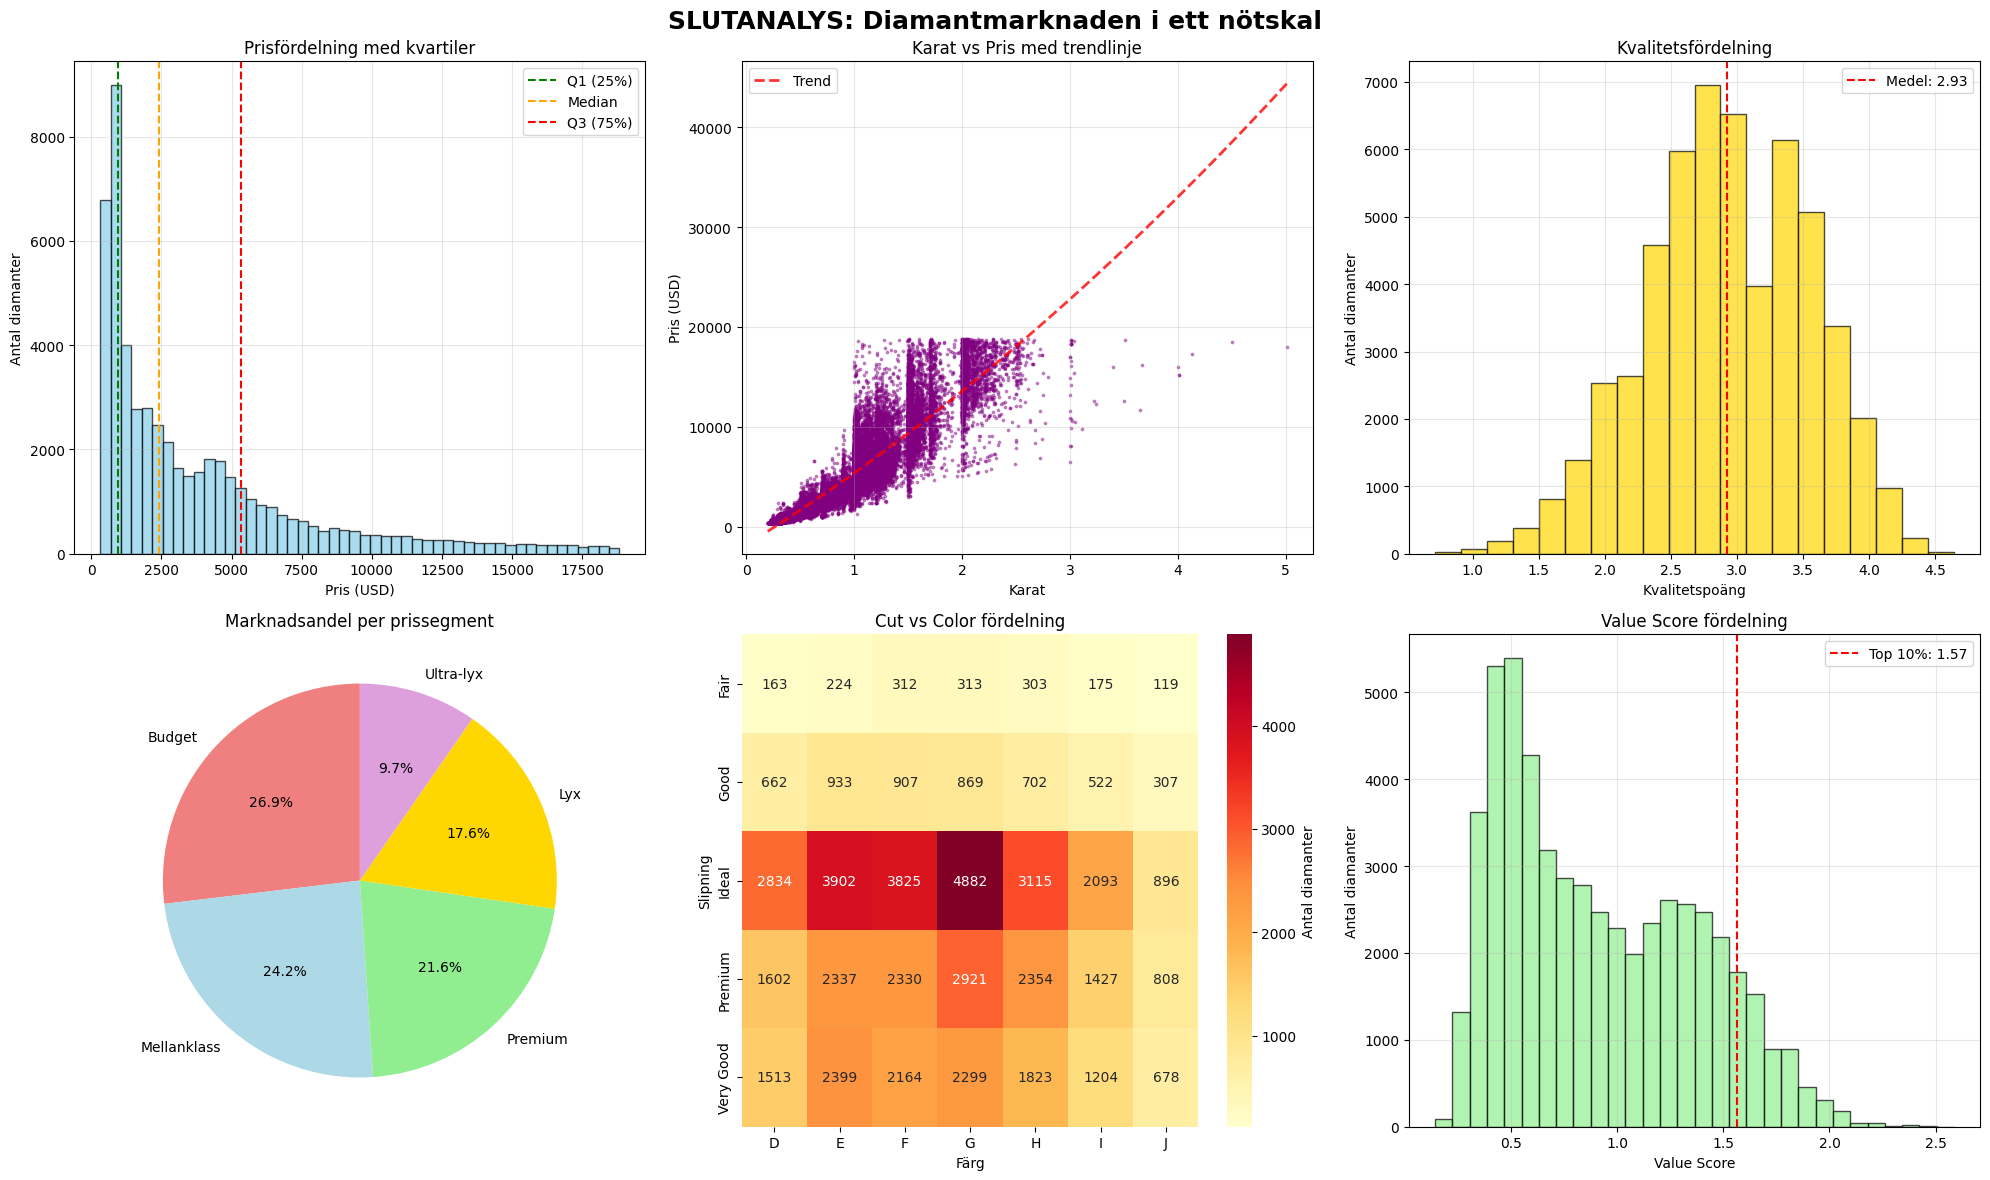

In [171]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('SLUTANALYS: Diamantmarknaden i ett nötskal', fontsize=18, fontweight='bold')


axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['price'].quantile(0.25), color='green', linestyle='--', label='Q1 (25%)')
axes[0,0].axvline(df['price'].median(), color='orange', linestyle='--', label='Median')
axes[0,0].axvline(df['price'].quantile(0.75), color='red', linestyle='--', label='Q3 (75%)')
axes[0,0].set_xlabel('Pris (USD)')
axes[0,0].set_ylabel('Antal diamanter')
axes[0,0].set_title('Prisfördelning med kvartiler')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)


axes[0,1].scatter(df['carat'], df['price'], alpha=0.4, s=3, color='purple')

z = np.polyfit(df['carat'], df['price'], 2)  # Quadratic fit
p = np.poly1d(z)
x_trend = np.linspace(df['carat'].min(), df['carat'].max(), 100)
axes[0,1].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend')
axes[0,1].set_xlabel('Karat')
axes[0,1].set_ylabel('Pris (USD)')
axes[0,1].set_title('Karat vs Pris med trendlinje')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)


if 'quality_score' in df.columns:
    axes[0,2].hist(df['quality_score'], bins=20, alpha=0.7, color='gold', edgecolor='black')
    axes[0,2].axvline(df['quality_score'].mean(), color='red', linestyle='--', 
                      label=f'Medel: {df["quality_score"].mean():.2f}')
    axes[0,2].set_xlabel('Kvalitetspoäng')
    axes[0,2].set_ylabel('Antal diamanter')
    axes[0,2].set_title('Kvalitetsfördelning')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
else:
    axes[0,2].text(0.5, 0.5, 'Kvalitetspoäng\ninte tillgänglig', 
                   ha='center', va='center', transform=axes[0,2].transAxes,
                   fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray'))
    axes[0,2].set_title('Kvalitetsfördelning')


if 'price_segment' in df.columns:
    segment_counts = df['price_segment'].value_counts()
    colors_pie = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum']
    wedges, texts, autotexts = axes[1,0].pie(segment_counts.values, 
                                             labels=[seg.split(' (')[0] for seg in segment_counts.index],
                                             autopct='%1.1f%%', 
                                             colors=colors_pie[:len(segment_counts)],
                                             startangle=90)
    axes[1,0].set_title('Marknadsandel per prissegment')
else:
    axes[1,0].text(0.5, 0.5, 'Prissegment\ninte tillgängligt', 
                   ha='center', va='center', transform=axes[1,0].transAxes,
                   fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray'))
    axes[1,0].set_title('Marknadsandel per prissegment')


cut_color_matrix = pd.crosstab(df['cut'], df['color'])
sns.heatmap(cut_color_matrix, annot=True, fmt='d', ax=axes[1,1], 
            cmap='YlOrRd', cbar_kws={'label': 'Antal diamanter'})
axes[1,1].set_title('Cut vs Color fördelning')
axes[1,1].set_xlabel('Färg')
axes[1,1].set_ylabel('Slipning')


if 'value_score' in df.columns:
    axes[1,2].hist(df['value_score'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,2].axvline(df['value_score'].quantile(0.9), color='red', linestyle='--',
                      label=f'Top 10%: {df["value_score"].quantile(0.9):.2f}')
    axes[1,2].set_xlabel('Value Score')
    axes[1,2].set_ylabel('Antal diamanter')
    axes[1,2].set_title('Value Score fördelning')
    axes[1,2].legend()
    axes[1,2].grid(True, alpha=0.3)
else:
    axes[1,2].text(0.5, 0.5, 'Value Score\ninte tillgängligt', 
                   ha='center', va='center', transform=axes[1,2].transAxes,
                   fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray'))
    axes[1,2].set_title('Value Score fördelning')

plt.tight_layout()
plt.show()


In [176]:
print("\n PRAKTISKA REKOMMENDATIONER OCH HANDLINGSPLAN:")
print("=" * 55)

print("\n TOP 5 TAKEAWAYS:")
print("-" * 20)
print("1.  KARAT ÄR KUNG - starkaste prisfaktorn med råge")
print("2.  UNDVIK 'MAGISKA' STORLEKAR - spara 8-15% genom att välja 0.9ct istället för 1.0ct")  
print("3.  BALANCE ÄR NYCKELN - Very Good cut + G färg + SI1 clarity = bästa värdet")
print("4.  ANVÄND DATA - Value score och prisavvikelser avslöjar dolda pärlor")
print("5.  UNDVIK EXTREMER - outliers i proportioner är ofta dåliga köp")

print("\n HANDLINGSPLAN FÖR KÖPARE:")
print("-" * 30)

print(" FÖRE KÖPET:")
print("    Prioritera: Storlek vs Kvalitet vs Pris")
print("    Använd våra prisreferenstabeller")
print("    Leta efter diamanter med hög value score")
print("    Kontrollera proportioner (depth 58-65%, table 54-60%)")

print("\n UNDER KÖPPROCESSEN:")
print("    Jämför flera alternativ inom samma prisklass")
print("    Överväg storlekar strax under 'magiska' tresholds")
print("    Kontrollera cut-kvalitet noga (påverkar glans mest)")



print("\n FÖR ÅTERFÖRSÄLJARE OCH INVESTERARE:")
print("-" * 40)
print(" MARKNADSTRENDS ATT BEVAKA:")
print("   • Budget-segmentet (< $1,000) dominerar volymen")
print("   • Premium-segmentet ($2,500-$5,000) har bästa lönsamheten")
print("   • Ideal cut blir allt vanligare - differentiering viktig")
print("   • Färg G-H är sweet spot för de flesta konsumenter")

print("\n LAGEROPTIMERING:")
optimal_inventory = df.groupby(['cut', 'color', 'clarity']).size().nlargest(10)
print("    Mest efterfrågade kombinationer:")
for (cut, color, clarity), count in optimal_inventory.head(5).items():
    percentage = (count / len(df)) * 100
    print(f"      • {cut} {color} {clarity}: {count:,} st ({percentage:.1f}%)")

print("\n PRISSÄTTNINGSSTRATEGI:")
if 'value_score' in df.columns:
    underpriced = len(df[df['price_deviation_pct'] < -10])
    overpriced = len(df[df['price_deviation_pct'] > 10])
    print(f"   • {underpriced:,} diamanter är underprissatta (möjlighet)")
    print(f"   • {overpriced:,} diamanter är överprissatta (risk)")


 PRAKTISKA REKOMMENDATIONER OCH HANDLINGSPLAN:

 TOP 5 TAKEAWAYS:
--------------------
1.  KARAT ÄR KUNG - starkaste prisfaktorn med råge
2.  UNDVIK 'MAGISKA' STORLEKAR - spara 8-15% genom att välja 0.9ct istället för 1.0ct
3.  BALANCE ÄR NYCKELN - Very Good cut + G färg + SI1 clarity = bästa värdet
4.  ANVÄND DATA - Value score och prisavvikelser avslöjar dolda pärlor
5.  UNDVIK EXTREMER - outliers i proportioner är ofta dåliga köp

 HANDLINGSPLAN FÖR KÖPARE:
------------------------------
 FÖRE KÖPET:
    Prioritera: Storlek vs Kvalitet vs Pris
    Använd våra prisreferenstabeller
    Leta efter diamanter med hög value score
    Kontrollera proportioner (depth 58-65%, table 54-60%)

 UNDER KÖPPROCESSEN:
    Jämför flera alternativ inom samma prisklass
    Överväg storlekar strax under 'magiska' tresholds
    Kontrollera cut-kvalitet noga (påverkar glans mest)

 FÖR ÅTERFÖRSÄLJARE OCH INVESTERARE:
----------------------------------------
 MARKNADSTRENDS ATT BEVAKA:
   • Budget-segmen